In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix
from torch.utils.data import DataLoader
from biosppy.signals.ecg import gamboa_segmenter, hamilton_segmenter, ssf_segmenter, ecg, extract_heartbeats, engzee_segmenter

In [2]:
torch.cuda.is_available()

True

In [18]:
X_train_df = pd.read_csv('X_train.csv')
X_test_df = pd.read_csv('X_test.csv')
y_train_df = pd.read_csv('y_train.csv')

In [10]:
sample_df = pd.read_csv('sample.csv')

In [3]:
#pip install biosppy

     |████████████████████████████████| 85 kB 268 kB/s eta 0:00:01
     |████████████████████████████████| 60.3 MB 70 kB/s  eta 0:00:01
  Created wheel for biosppy: filename=biosppy-0.7.3-py2.py3-none-any.whl size=95409 sha256=01a8f930f51071230017415bda2aa6ef229882e5d0c0b45d42971da30e50994c
  Stored in directory: /home/mawskay/.cache/pip/wheels/2f/4f/8f/28b2adc462d7e37245507324f4817ce1c64ef2464f099f4f0b
Successfully built biosppy
Note: you may need to restart the kernel to use updated packages.


In [ ]:
np.array(y_train_df)[idx][1:]

array([0])

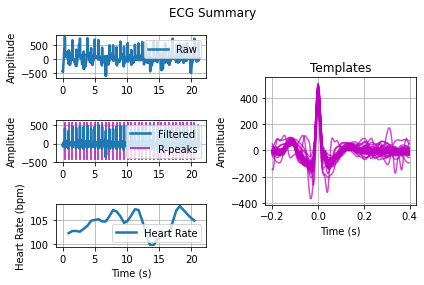

In [6]:
idx = 50
l = np.array(X_train_df)[idx][1:]
l = l[~np.isnan(l)]
rps = gamboa_segmenter(l)
#rps = hamilton_segmenter(l)
#rps = ssf_segmenter(l)
rtrn = ecg(l, 400, show = True)
hb = extract_heartbeats(rtrn[1], rtrn[2])[0]
#hb = extract_heartbeats(l, rps[0])[0]

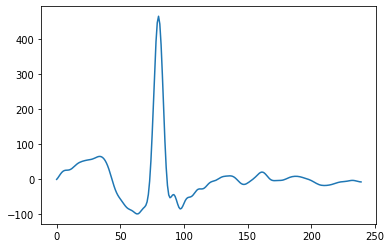

In [ ]:
plt.plot(rtrn[4][2])
plt.show()

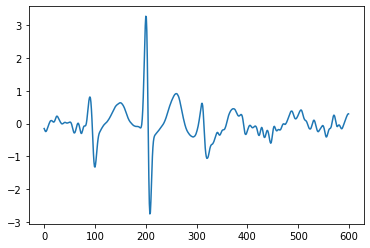

In [ ]:
plt.plot(np.mean(temps, axis = 0))
plt.show()

In [8]:
def extract_mean_heartbeats(idx):
    l = np.array(X_train_df)[idx][500:]
    l = l[~np.isnan(l)]
    l1 = (l - np.mean(l))/np.std(l)
    indices = np.where(l > np.quantile(l, 0.99))[0]
    temp_x_p = indices[0]
    temp_l = []
    rp_indices = []
    for i in range(len(indices)):
        temp_x = indices[i]
        if temp_x < temp_x_p + 20:
            temp_l.append(temp_x)
        else:
            rp_indices.append(int(np.mean(temp_l)))
            temp_l = [temp_x]
        temp_x_p = temp_x
    return np.mean(extract_heartbeats(l1, rp_indices)[0], axis =0)

In [9]:
def extract_mean_heartbeats_bios(idx):
    l = np.array(X_train_df)[idx][500:4500]
    l = l[~np.isnan(l)]
    rps = gamboa_segmenter(l)
    rtrn = ecg(l, 300, show= True)
    hb = extract_heartbeats(rtrn[1], rtrn[2])[0]
    print(np.mean(np.std(rtrn[4], axis=0)))
    return np.mean(hb, axis = 0)

In [464]:
def plot_features(signal):
    r_peaks = engzee_segmenter(signal, 300)['rpeaks']
    #print(r_peaks)
    if len(r_peaks) >= 2:
        #print(ecg.extract_heartbeats(signal, r_peaks, 300))
        beats = extract_heartbeats(signal, r_peaks, 300)['templates']

        if len(beats) != 0:
            mu = np.mean(beats, axis=0) 
            var = np.std(beats, axis=0)
            md = np.median(beats, axis=0)
            
            plt.plot(range(mu.shape[0]), mu, label='Average HeartBeat')
            # Fill the variance range
            plt.fill_between(range(mu.shape[0]), mu - var, mu + var, linewidth=0, alpha=0.1)
            # Plot a median
            plt.plot(range(md.shape[0]), md, 'k', label='Median HeartBeat', color='#CC4F1B')

In [123]:
y_train_df[y_train_df.y == 0].index[400]

662

In [95]:
np.mean(y_train_df[y_train_df.y == 1])

id                         -0.023652
y                           1.000000
mean_hb_variance            0.037666
peak_variance               0.067761
variance                    0.203024
max_rbm                    93.715879
mean_rbm                   78.214771
variance_rbm                6.192324
median_hb_max_min_ratio     2.238816
p_wave                      0.126666
t_wave                      0.046918
median_hb_min              -0.312576
peak_mean                   0.606192
Qamplitude                 -0.212424
Samplitude                 -0.206456
QRSduration                87.945824
dtype: float64

In [94]:
np.mean(y_train_df[y_train_df.y == 2])

id                          0.015593
y                           2.000000
mean_hb_variance            0.037163
peak_variance               0.069114
variance                    0.197846
max_rbm                    93.419610
mean_rbm                   77.292207
variance_rbm                6.385968
median_hb_max_min_ratio     2.298595
p_wave                      0.123074
t_wave                      0.044792
median_hb_min              -0.298574
peak_mean                   0.586090
Qamplitude                 -0.206182
Samplitude                 -0.195303
QRSduration                89.696744
dtype: float64

In [93]:
np.mean(y_train_df[y_train_df.y == 0])

id                         -0.007928
y                           0.000000
mean_hb_variance            0.035493
peak_variance               0.068266
variance                    0.200066
max_rbm                    92.143484
mean_rbm                   76.757726
variance_rbm                6.171829
median_hb_max_min_ratio     2.318992
p_wave                      0.125159
t_wave                      0.044614
median_hb_min              -0.296887
peak_mean                   0.599875
Qamplitude                 -0.211711
Samplitude                 -0.194152
QRSduration                90.794389
dtype: float64

In [96]:
np.mean(y_train_df[y_train_df.y == 3])

id                          0.067747
y                           3.000000
mean_hb_variance            0.035771
peak_variance               0.071383
variance                    0.202171
max_rbm                    94.952677
mean_rbm                   79.575856
variance_rbm                6.410378
median_hb_max_min_ratio     2.258304
p_wave                      0.121469
t_wave                      0.043355
median_hb_min              -0.290462
peak_mean                   0.589882
Qamplitude                 -0.212164
Samplitude                 -0.182060
QRSduration                90.670588
dtype: float64

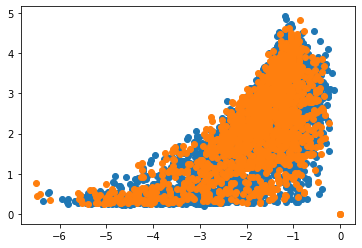

In [503]:
plt.scatter(y_train_df[y_train_df.y == 0]['median_hb_min'], y_train_df[y_train_df.y == 0]['median_hb_max_min_ratio'])
plt.scatter(y_train_df[y_train_df.y == 2]['median_hb_min'], y_train_df[y_train_df.y == 2]['median_hb_max_min_ratio'])
plt.show()

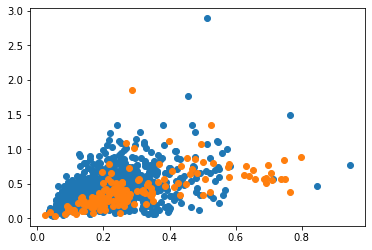

In [520]:
plt.scatter(y_train_df[y_train_df.y == 2]['mean_hb_variance'], y_train_df[y_train_df.y == 2]['peak_variance'])
plt.scatter(y_train_df[y_train_df.y == 3]['mean_hb_variance'], y_train_df[y_train_df.y == 3]['peak_variance'])
plt.show()

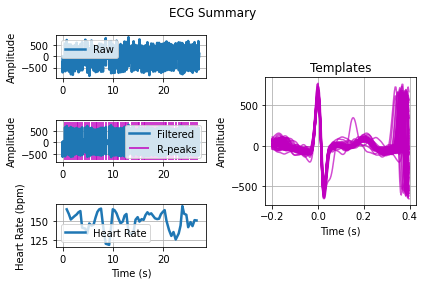

In [160]:
l = np.array(X_train_df)[3]
l = l[~np.isnan(l)]
rps = gamboa_segmenter(l)
rtrn = ecg(l, 300, show= True)

In [337]:
np.expand_dims(np.zeros(5), axis = 0)

array([[0., 0., 0., 0., 0.]])

In [347]:
len(rtrn[3])

180

In [524]:
y_train_df[y_train_df.y == 0].index[600]

1004

In [527]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 0].index[600]]
l = l[~np.isnan(l)]

In [532]:
np.sign(np.mean(l))

1.0

In [598]:
y_train_df[y_train_df.y == 0].index[120]

214

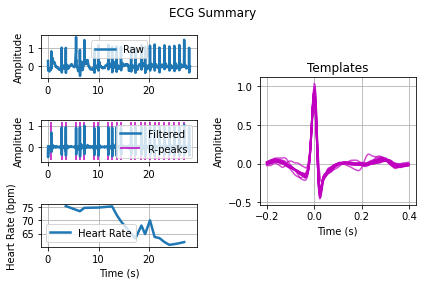

0.45555555555555555
0.06421658992198351
0.2368602875522668


In [610]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 2].index[90]]
l = l[~np.isnan(l)] 
l = np.sign(np.mean(l))*l / 1000
rtrn = ecg(l, 300, show= True)
print(abs(np.median([np.argmax(rtrn[4][i][np.argmax(rtrn[4][i])+np.argmin(rtrn[4][i][np.argmax(rtrn[4][i]):]):])/len(rtrn[4][i]) for i in range(len(rtrn[2]))])))
print(np.median([np.std(rtrn[4][i][: np.argmax(abs(rtrn[4][i])) - 10]) for i in range(len(rtrn[4]))]))
print(np.median([np.std(rtrn[4][i][: np.argmax(abs(rtrn[4][i])) + 30]) for i in range(len(rtrn[4]))]))

In [562]:
np.argmax(rtrn[4][i][np.argmax(rtrn[4][0])+np.argmin(rtrn[4][i][np.argmax(rtrn[4][0]):]):])

54

In [568]:
rtrn[4][i][np.argmax(rtrn[4][0])+np.argmin(rtrn[4][i][np.argmax(rtrn[4][0]):]):]

array([0.13718332])

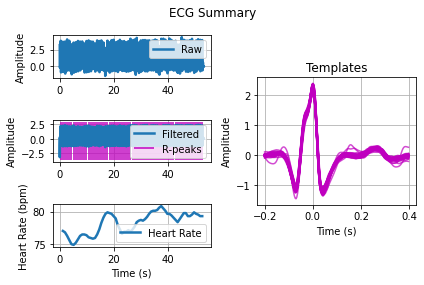

1.9856366927988434
1.8333895266159372
0.37222222222222223


In [582]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 2].index[130]]
l = l[~np.isnan(l)]
l = np.sign(np.mean(l))*l / np.std(l)
rtrn = ecg(l, 300, show= True)
print(abs(np.median(np.max(rtrn[4], axis = 1)))/ abs(np.median([min(rtrn[4][i][:np.argmax(rtrn[4][i])]) for i in range(len(rtrn[2]))])))
print(abs(np.median(np.max(rtrn[4], axis = 1)))/ abs(np.median([min(rtrn[4][i][np.argmax(rtrn[4][i]):]) for i in range(len(rtrn[2]))])))
print(np.median([np.argmax(rtrn[4][i][np.argmax(rtrn[4][i])+np.argmin(rtrn[4][i][np.argmax(rtrn[4][i]):]):])/len(rtrn[4][i]) for i in range(len(rtrn[2]))]))

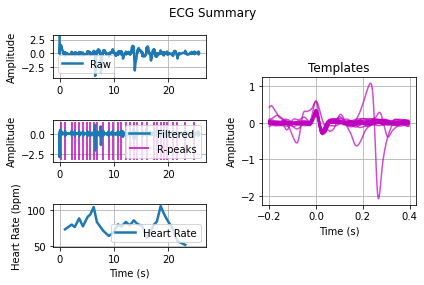

166.53333333333333


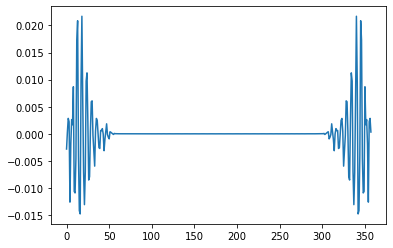

In [691]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 3].index[90]]
l = l[~np.isnan(l)]
l = np.sign(np.mean(l))*l / 1000
rtrn = ecg(l, 300, show= True)
print(np.mean([np.sum(np.fft.irfft(rtrn[4][i]) > 1e-6) for i in range(len(rtrn[4]))]))
plt.plot(np.fft.irfft(rtrn[4][1]))
plt.show()

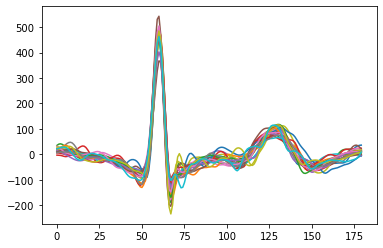

In [301]:
for i in range(20):
    plt.plot(rtrn[4][i])
plt.show()

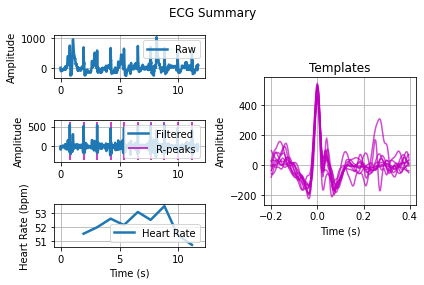

In [117]:
l = np.array(X_train_df)[9]
l = l[~np.isnan(l)]
rps = gamboa_segmenter(l)
rtrn = ecg(l, 300, show= True)

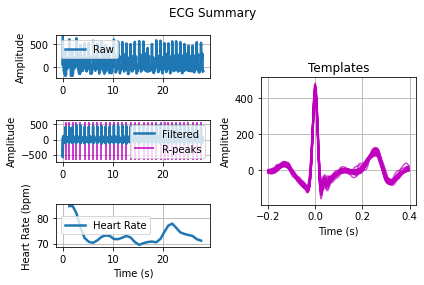

In [119]:
l = np.array(X_train_df)[662]
l = l[~np.isnan(l)]
rps = gamboa_segmenter(l)
rtrn = ecg(l, 300, show= True)

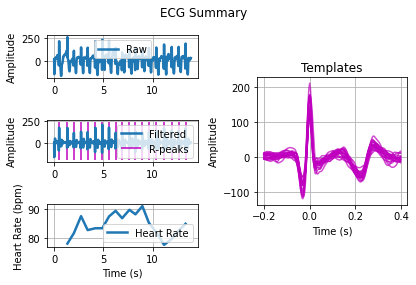

In [66]:
l = np.array(X_train_df)[16]
l = l[~np.isnan(l)]
rps = gamboa_segmenter(l)
rtrn = ecg(l, 300, show= True)

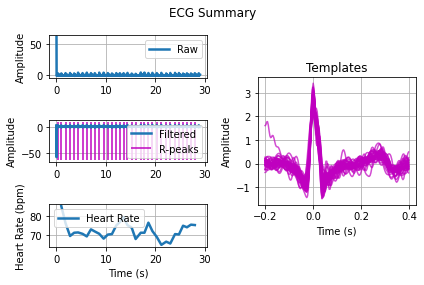

In [110]:
import scipy.integrate as integrate

l = np.array(X_train_df)[5084]
l = l[~np.isnan(l)]
l = l / np.std(l) 
rtrn = ecg(l, 300, show= True)

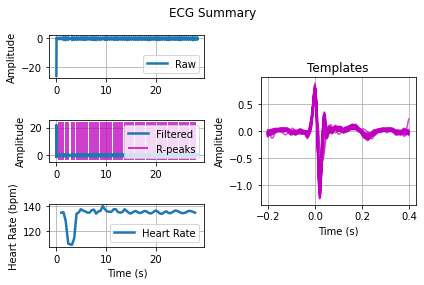

In [108]:
l = np.array(X_train_df)[5103]
l = l[~np.isnan(l)]
l = l / np.std(l) 
rtrn = ecg(np.gradient(l), 300, show= True)

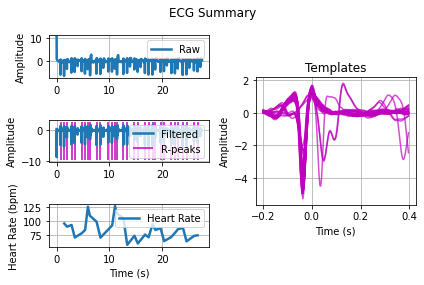

In [479]:
l = np.array(X_train_df)[1414]
l = l[~np.isnan(l)]
l = l / np.std(l) 
rtrn = ecg(l, 300, show= True)

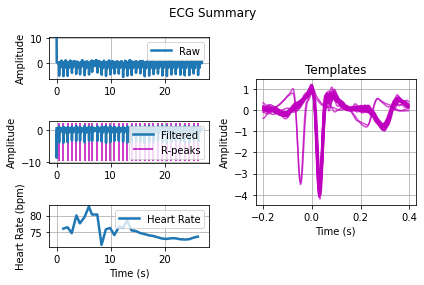

In [478]:
l = np.array(X_train_df)[1783]
l = l[~np.isnan(l)]
l = l / np.std(l) 
rtrn = ecg(l, 300, show= True)

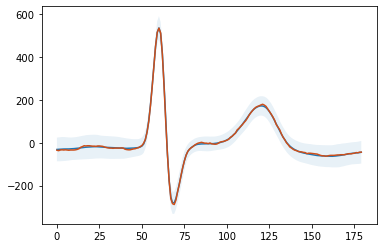

In [477]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 0].index[1000]]
l = l[~np.isnan(l)]
plot_features(l)
plt.show()

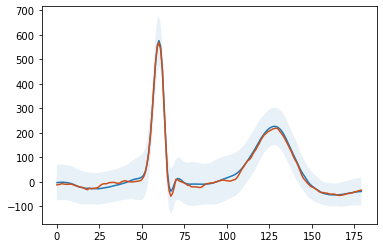

In [475]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 2].index[100]]
l = l[~np.isnan(l)]
plot_features(l)
plt.show()

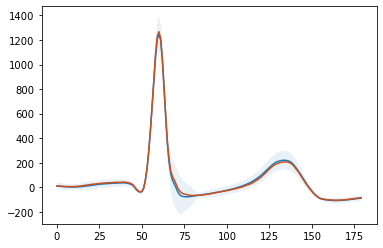

In [467]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 2].index[300]]
l = l[~np.isnan(l)]
plot_features(l)
plt.show()

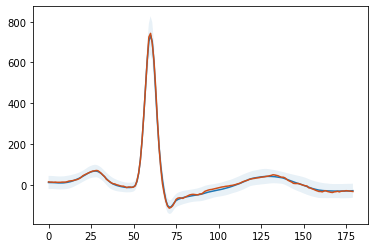

In [599]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 2].index[400]]
l = -l[~np.isnan(l)]
plot_features(l)
plt.show()

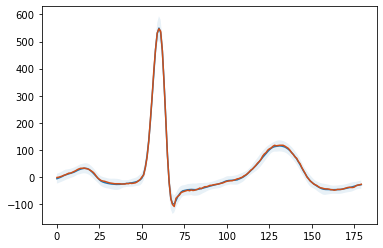

In [476]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 0].index[500]]
l = l[~np.isnan(l)]
plot_features(l)
plt.show()

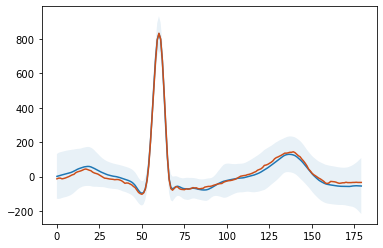

In [474]:
l = np.array(X_train_df)[y_train_df[y_train_df.y == 0].index[100]]
l = l[~np.isnan(l)]
plot_features(l)
plt.show()

In [112]:
abs(np.median(np.max(rtrn[4], axis = 1)))/ abs(np.median(np.min(rtrn[4], axis = 1)))

0.33403154691828135

In [ ]:
np.std([rtrn[1][i] for i in rtrn[2]])

124.50509274032045

In [ ]:
np.mean(np.std(rtrn[4], axis=0))

129.44137056250491

In [16]:
def mean_wave(X_train_df, y_train_df):
    new_df = y_train_df[['id', 'y']].copy()
    new_array = np.zeros((len(new_df), 180*4))
    for idx in tqdm(y_train_df.index):
        l = np.array(X_train_df)[idx]
        l = l[~np.isnan(l)]
        l = np.sign(np.mean(l))*l / 1000
        rtrn = ecg(np.gradient(l), 300, show= False)
        mean_wave = np.mean(rtrn[4], axis = 0)
        upper_wave = np.mean(rtrn[4], axis = 0) + np.std(rtrn[4], axis = 0)
        lower_wave = np.mean(rtrn[4], axis = 0) - np.std(rtrn[4], axis = 0)
        gradient_wave = np.gradient(mean_wave)
        for i in range(len(mean_wave)):
            new_array[idx][i] = mean_wave[i]
            new_array[idx][180 + i] = upper_wave[i]
            new_array[idx][180*2 + i] = lower_wave[i]
            new_array[idx][180*3 + i] = gradient_wave[i]
        if idx == 1:
            print(new_array[0])
    for i in range(len(mean_wave)):
        new_df['m' + str(i)] = new_array[:, i]
        new_df['u' + str(i)] = new_array[:, 180 + i]
        new_df['l' + str(i)] = new_array[:, 180*2 + i]
        new_df['g' + str(i)] = new_array[:, 180*3 + i]
    return new_df

In [20]:
def ten_waves(X_train_df):
    new_array = np.zeros((len(X_train_df), 180*10))
    l1 = []
    for idx in tqdm(X_train_df.index):
        l = np.array(X_train_df)[idx]
        l = l[~np.isnan(l)]
        l = np.sign(np.mean(l))*l / 1000
        rtrn = ecg(l, 300, show= False)
        if len(rtrn[4]) < 10:
            l1.append(idx)
            continue
        for j in range(10):
            for i in range(len(rtrn[4][0])):
                if int(len(rtrn[4])/2) > 10:
                    new_array[idx][i + j*180] = rtrn[4][int(len(rtrn[4])/2) + j][i]
                else:
                    new_array[idx][i + j*180] = rtrn[4][j][i]
    return new_array, l1

In [6]:
data, errs = ten_waves(X_train_df)

100%|██████████| 5117/5117 [19:51<00:00,  4.29it/s]


In [101]:
1

1

In [19]:
#new_train_df = mean_wave(X_train_df, y_train_df)
new_test_df = mean_wave(X_test_df, sample_df)

  0%|          | 3/3411 [00:00<11:18,  5.02it/s]

[ 3.26761271e-03  3.63285669e-03  4.06372727e-03  4.50260614e-03
  4.88155660e-03  5.18703962e-03  5.47180179e-03  5.80160175e-03
  6.17554423e-03  6.48191406e-03  6.52893428e-03  6.13767240e-03
  5.23976209e-03  3.91721384e-03  2.35876080e-03  7.60837647e-04
 -7.64862983e-04 -2.22255207e-03 -3.68889986e-03 -5.22855178e-03
 -6.82444269e-03 -8.36413228e-03 -9.68392961e-03 -1.06355558e-02
 -1.11300225e-02 -1.11362965e-02 -1.06514074e-02 -9.68439293e-03
 -8.28628979e-03 -6.61464341e-03 -4.97441945e-03 -3.76891177e-03
 -3.34473495e-03 -3.80052446e-03 -4.88789939e-03 -6.10660870e-03
 -6.97828507e-03 -7.34399459e-03 -7.47668984e-03 -7.89617652e-03
 -8.97961741e-03 -1.06340959e-02 -1.22929924e-02 -1.32836363e-02
 -1.33247396e-02 -1.27714385e-02 -1.23752471e-02 -1.26907086e-02
 -1.35684805e-02 -1.41510049e-02 -1.33902014e-02 -1.06156503e-02
 -5.52568893e-03  2.60722226e-03  1.59393496e-02  3.81322671e-02
  7.26251736e-02  1.19375819e-01  1.71761962e-01  2.15997998e-01
  2.34593207e-01  2.13231

100%|██████████| 3411/3411 [09:04<00:00,  6.26it/s]


In [119]:
new_train_df.to_csv('df_mean_wave_gradient.csv', index = False)

In [122]:
model.cuda()

resnet1d(
  (melresnet_model): Sequential(
    (0): Conv1d(4, 16, kernel_size=(5,), stride=(1,), bias=False)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): _ResBlock(
      (resblock_model): Sequential(
        (0): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (4): _ResBlock(
      (resblock_model): Sequential(
        (0): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (4): BatchNor

In [2]:
new_df = pd.read_csv('df_mean_wave_gradient.csv')

In [3]:
from torch import nn
class _ResBlock(nn.Module):
    r"""ResNet block based on "Deep Residual Learning for Image Recognition"

    The paper link is https://arxiv.org/pdf/1512.03385.pdf.

    Args:
        n_freq: the number of bins in a spectrogram (default=128)

    Examples
        >>> resblock = _ResBlock()
        >>> input = torch.rand(10, 128, 512)  # a random spectrogram
        >>> output = resblock(input)  # shape: (10, 128, 512)
    """

    def __init__(self, n_freq: int = 128) -> None:
        super().__init__()

        self.resblock_model = nn.Sequential(
            nn.Conv1d(in_channels=n_freq, out_channels=n_freq, kernel_size=1, bias=False),
            nn.BatchNorm1d(n_freq),
            nn.ReLU(inplace=True),
            nn.Conv1d(in_channels=n_freq, out_channels=n_freq, kernel_size=1, bias=False),
            nn.BatchNorm1d(n_freq)
        )
        

    def forward(self, specgram: torch.Tensor) -> torch.Tensor:
        r"""Pass the input through the _ResBlock layer.
        Args:
            specgram (Tensor): the input sequence to the _ResBlock layer (n_batch, n_freq, n_time).

        Return:
            Tensor shape: (n_batch, n_freq, n_time)
        """

        return self.resblock_model(specgram) + specgram

class resnet1d(torch.nn.Module):
    def __init__(self,
                 n_res_block: int = 5,
                 n_freq: int = 3,
                 n_hidden: int = 16,
                 n_output: int = 16,
                 kernel_size: int = 5,
                hidden_size: int = 300,
                n_classes: int = 4,
                transformer = False) -> None:
        super().__init__()

        ResBlocks = [_ResBlock(n_hidden) for _ in range(n_res_block)]
        
        #self.transformer_model = nn.RNN(input_size=1801, hidden_size=1801, bidirectional=True)
        self.transformer = transformer
        
        self.melresnet_model = nn.Sequential(
            nn.Conv1d(in_channels=n_freq, out_channels=n_hidden, kernel_size=kernel_size, bias=False),
            nn.BatchNorm1d(n_hidden),
            nn.ReLU(inplace=True),
            *ResBlocks,
            nn.Conv1d(in_channels=n_hidden, out_channels=n_output, kernel_size=1)
        ) 
        
        self.input_size = 176*n_output
        if transformer:
            self.input_size = 3583*n_output
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.dropout1 = torch.nn.Dropout(p=0.01)
        self.fc2 = torch.nn.Linear(self.hidden_size, int(self.hidden_size/2))
        self.dropout2 = torch.nn.Dropout(p=0.1)
        self.fc3 = torch.nn.Linear(int(self.hidden_size/2), int(self.hidden_size/4))
        self.relu = torch.nn.ReLU()
        s = int(self.hidden_size)
        self.fc4 = torch.nn.Linear(s, n_classes)
        self.sigmoid = torch.nn.Sigmoid() 
        
    def forward(self, x):
        if self.transformer:
            x = self.transformer_model(x)[0]
        x = self.melresnet_model(x)
        try:
            hidden = self.fc1(x.reshape(x.size(0), x.size(1)*x.size(2)))
        except:
            print(x.size(1), x.size(2))
            ok
        relu = self.relu(self.dropout1(hidden))
        #hidden = self.fc2(relu)
        #relu = self.relu(self.dropout2(hidden))
        #hidden = self.fc3(relu)
        #relu = self.relu(self.dropout2(hidden))
        output = self.fc4(relu)
        return output

In [ ]:
torch.Tensor([1]).cud

In [5]:
model = resnet1d(n_classes = 4, n_freq = 4, transformer = False).cuda()

In [11]:
np.union1d(np.zeros(4), np.ones(4))

array([0., 1.])

In [7]:
new_df = new_df[new_df.y != 3]

In [19]:
new_train_df = pd.read_csv('new_train_df.csv')
new_df = new_train_df[new_train_df.columns[1:]]

In [58]:
np.random.random()-0.5

-0.46024888859657187

In [4]:
def random_translate(batch, p = 0.3):
    new_batch = np.zeros(batch.size())
    for i in range(batch.size(0)):
        shift = int(batch.size(2)*(np.random.random()*2-1)*p)
        s = np.sign(np.random.random()-0.5)
        zeros = int((batch.size(2) - int(shift/2))*np.random.random())
        for j in range(batch.size(1)):
            if shift == 0:
                new_batch[i][j] = s*batch[i][j]
            elif shift > 0:
                new_batch[i][j][shift:] = s*batch[i][j][:-shift]
                #new_batch[i][j][:shift] = batch[i][j][-shift:]
            else:
                new_batch[i][j][:shift] = s*batch[i][j][-shift:]
                #new_batch[i][j][shift:] = batch[i][j][:-shift]
            new_batch[i][j][zeros:zeros + int(shift/2)] *= 0
    return torch.Tensor(new_batch)

In [14]:
from sklearn.metrics import f1_score, confusion_matrix
model = resnet1d(n_classes = 4, n_freq = 4, transformer = False).cuda()
model.train()
epoch = 500
lr = 1e-4
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
downsample_cls0 = np.random.choice(new_df[new_df.y == 0].index, 2, replace = False)
original_train_indexes = np.random.choice(new_df.index, len(new_df)-150, replace = False)
train_indexes = np.setdiff1d(original_train_indexes, downsample_cls0)
x_train = torch.Tensor(new_df[new_df.index.isin(train_indexes)].values[:, 2:].reshape((len(train_indexes), 4, 180)))
y_train = torch.LongTensor(new_df[new_df.index.isin(train_indexes)]['y'].values.ravel())
train_loader = DataLoader(list(zip(x_train, y_train)), batch_size=70, shuffle=True, num_workers=3)
print(new_df[new_df.index.isin(train_indexes)]['y'].value_counts())
x_eval = torch.Tensor(new_df[~new_df.index.isin(original_train_indexes)].values[:, 2:].reshape((150, 4, 180)))
y_eval = torch.LongTensor(new_df[~new_df.index.isin(original_train_indexes)]['y'].values.ravel())
eval_loader = DataLoader(list(zip(x_eval, y_eval)), batch_size=70, shuffle=False, num_workers=3)
print(new_df[~new_df.index.isin(original_train_indexes)]['y'].value_counts())
best_score = 0
for epoch in tqdm(range(epoch)):
    for batch, y in train_loader:
        batch = torch.FloatTensor(batch.numpy() + 1e-3*np.random.rand(batch.numpy().shape[0],
                                    batch.numpy().shape[1],
                                   batch.numpy().shape[2]))
        batch = random_translate(batch, p = 0.2)
        optimizer.zero_grad()    # Forward pass
        y_pred = model(batch.cuda())    # Compute Loss
        loss = criterion(y_pred, y.cuda())
        loss.backward()
        optimizer.step()
    model.eval()
    y_pred = []
    for batch, _ in eval_loader:
        y_pred.append(torch.argmax(model(batch.cuda()), axis = 1).cpu().detach())
    y_pred = torch.cat(y_pred).numpy()
    print(loss)
    score = f1_score(y_eval.cpu(), y_pred, average='micro')
    if score > best_score:
        best_score = score
        torch.save(model.state_dict(), 'best_model.pth')
        print('saved with score: ', best_score)
        print(confusion_matrix(y_eval.cpu(), y_pred))
    print(score)

  0%|          | 0/500 [00:00<?, ?it/s]

0    2936
2    1433
1     428
3     168
Name: y, dtype: int64
0    92
2    41
1    15
3     2
Name: y, dtype: int64


  0%|          | 1/500 [00:01<11:18,  1.36s/it]

tensor(0.9843, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.6133333333333333
[[91  0  1  0]
 [15  0  0  0]
 [41  0  0  0]
 [ 1  0  0  1]]
0.6133333333333333


  0%|          | 2/500 [00:02<11:07,  1.34s/it]

tensor(1.0199, device='cuda:0', grad_fn=<NllLossBackward>)
0.6


  1%|          | 3/500 [00:04<11:00,  1.33s/it]

tensor(0.8588, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


  1%|          | 4/500 [00:05<10:58,  1.33s/it]

tensor(0.9086, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.6266666666666667
[[89  1  1  1]
 [13  1  1  0]
 [38  1  2  0]
 [ 0  0  0  2]]
0.6266666666666667


  1%|          | 5/500 [00:06<10:57,  1.33s/it]

tensor(1.0337, device='cuda:0', grad_fn=<NllLossBackward>)
0.6


  1%|          | 6/500 [00:07<10:44,  1.31s/it]

tensor(0.8683, device='cuda:0', grad_fn=<NllLossBackward>)
0.56


  1%|▏         | 7/500 [00:09<10:43,  1.31s/it]

tensor(1.0973, device='cuda:0', grad_fn=<NllLossBackward>)
0.5733333333333334


  2%|▏         | 8/500 [00:10<10:42,  1.31s/it]

tensor(0.8507, device='cuda:0', grad_fn=<NllLossBackward>)
0.6


  2%|▏         | 9/500 [00:11<10:38,  1.30s/it]

tensor(0.9518, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


  2%|▏         | 10/500 [00:13<10:36,  1.30s/it]

tensor(0.9043, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.6466666666666666
[[89  1  0  2]
 [11  3  1  0]
 [35  2  3  1]
 [ 0  0  0  2]]
0.6466666666666666


  2%|▏         | 11/500 [00:14<10:35,  1.30s/it]

tensor(0.7069, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.66
[[87  0  5  0]
 [11  3  1  0]
 [31  3  7  0]
 [ 0  0  0  2]]
0.66


  2%|▏         | 12/500 [00:15<10:37,  1.31s/it]

tensor(0.8292, device='cuda:0', grad_fn=<NllLossBackward>)
0.6066666666666667


  3%|▎         | 13/500 [00:17<10:29,  1.29s/it]

tensor(0.9538, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  3%|▎         | 14/500 [00:18<10:24,  1.28s/it]

tensor(0.9408, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  3%|▎         | 15/500 [00:19<10:26,  1.29s/it]

tensor(0.9186, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


  3%|▎         | 16/500 [00:20<10:26,  1.30s/it]

tensor(0.9375, device='cuda:0', grad_fn=<NllLossBackward>)
0.5933333333333334


  3%|▎         | 17/500 [00:22<10:20,  1.28s/it]

tensor(0.8487, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.6733333333333333
[[84  2  6  0]
 [ 9  3  3  0]
 [26  3 12  0]
 [ 0  0  0  2]]
0.6733333333333333


  4%|▎         | 18/500 [00:23<10:23,  1.29s/it]

tensor(0.8780, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  4%|▍         | 19/500 [00:24<10:20,  1.29s/it]

tensor(0.8787, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.68
[[88  1  3  0]
 [10  2  3  0]
 [28  2 10  1]
 [ 0  0  0  2]]
0.68


  4%|▍         | 20/500 [00:26<10:21,  1.29s/it]

tensor(0.8653, device='cuda:0', grad_fn=<NllLossBackward>)
0.5933333333333334


  4%|▍         | 21/500 [00:27<10:12,  1.28s/it]

tensor(0.8496, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


  4%|▍         | 22/500 [00:28<10:11,  1.28s/it]

tensor(0.9439, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


  5%|▍         | 23/500 [00:29<10:17,  1.29s/it]

tensor(0.8499, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


  5%|▍         | 24/500 [00:31<10:14,  1.29s/it]

tensor(0.7068, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


  5%|▌         | 25/500 [00:32<10:18,  1.30s/it]

tensor(0.9517, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  5%|▌         | 26/500 [00:33<10:19,  1.31s/it]

tensor(0.9545, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


  5%|▌         | 27/500 [00:35<10:18,  1.31s/it]

tensor(0.8412, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


  6%|▌         | 28/500 [00:36<10:13,  1.30s/it]

tensor(0.9077, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


  6%|▌         | 29/500 [00:37<10:08,  1.29s/it]

tensor(0.9848, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


  6%|▌         | 30/500 [00:38<10:01,  1.28s/it]

tensor(0.8551, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


  6%|▌         | 31/500 [00:40<10:02,  1.29s/it]

tensor(0.8601, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


  6%|▋         | 32/500 [00:41<10:02,  1.29s/it]

tensor(0.7270, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


  7%|▋         | 33/500 [00:42<10:05,  1.30s/it]

tensor(0.8984, device='cuda:0', grad_fn=<NllLossBackward>)
0.5866666666666667


  7%|▋         | 34/500 [00:44<10:05,  1.30s/it]

tensor(0.8855, device='cuda:0', grad_fn=<NllLossBackward>)
0.62


  7%|▋         | 35/500 [00:45<09:59,  1.29s/it]

tensor(0.8527, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  7%|▋         | 36/500 [00:46<09:53,  1.28s/it]

tensor(0.8596, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  7%|▋         | 37/500 [00:47<09:51,  1.28s/it]

tensor(0.8125, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  8%|▊         | 38/500 [00:49<09:49,  1.28s/it]

tensor(0.8161, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


  8%|▊         | 39/500 [00:50<09:54,  1.29s/it]

tensor(0.7233, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


  8%|▊         | 40/500 [00:51<10:02,  1.31s/it]

tensor(0.8478, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


  8%|▊         | 41/500 [00:53<10:00,  1.31s/it]

tensor(0.7264, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


  8%|▊         | 42/500 [00:54<10:03,  1.32s/it]

tensor(0.8251, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


  9%|▊         | 43/500 [00:55<09:59,  1.31s/it]

tensor(0.6532, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


  9%|▉         | 44/500 [00:57<09:56,  1.31s/it]

tensor(1.1743, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


  9%|▉         | 45/500 [00:58<09:51,  1.30s/it]

tensor(0.8142, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


  9%|▉         | 46/500 [00:59<09:50,  1.30s/it]

tensor(0.8104, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


  9%|▉         | 47/500 [01:00<09:42,  1.29s/it]

tensor(0.7196, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 10%|▉         | 48/500 [01:02<09:43,  1.29s/it]

tensor(0.7626, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 10%|▉         | 49/500 [01:03<09:42,  1.29s/it]

tensor(0.7685, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 10%|█         | 50/500 [01:04<09:40,  1.29s/it]

tensor(0.7028, device='cuda:0', grad_fn=<NllLossBackward>)
0.6066666666666667


 10%|█         | 51/500 [01:06<09:37,  1.29s/it]

tensor(0.7434, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 10%|█         | 52/500 [01:07<09:34,  1.28s/it]

tensor(0.8075, device='cuda:0', grad_fn=<NllLossBackward>)
0.6066666666666667


 11%|█         | 53/500 [01:08<09:32,  1.28s/it]

tensor(0.6816, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.7133333333333335
[[90  0  2  0]
 [ 6  3  6  0]
 [26  2 13  0]
 [ 0  0  1  1]]
0.7133333333333335


 11%|█         | 54/500 [01:10<09:40,  1.30s/it]

tensor(0.7210, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 11%|█         | 55/500 [01:11<09:34,  1.29s/it]

tensor(0.8783, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 11%|█         | 56/500 [01:12<09:32,  1.29s/it]

tensor(0.8463, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 11%|█▏        | 57/500 [01:13<09:29,  1.29s/it]

tensor(0.7061, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 12%|█▏        | 58/500 [01:15<09:24,  1.28s/it]

tensor(0.8073, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 12%|█▏        | 59/500 [01:16<09:23,  1.28s/it]

tensor(0.7384, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 12%|█▏        | 60/500 [01:17<09:21,  1.28s/it]

tensor(0.6736, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 12%|█▏        | 61/500 [01:18<09:21,  1.28s/it]

tensor(0.6749, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 12%|█▏        | 62/500 [01:20<09:19,  1.28s/it]

tensor(0.7032, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 13%|█▎        | 63/500 [01:21<09:14,  1.27s/it]

tensor(0.7876, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 13%|█▎        | 64/500 [01:22<09:12,  1.27s/it]

tensor(0.7179, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 13%|█▎        | 65/500 [01:24<09:20,  1.29s/it]

tensor(0.8381, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 13%|█▎        | 66/500 [01:25<09:15,  1.28s/it]

tensor(0.9576, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 13%|█▎        | 67/500 [01:26<09:19,  1.29s/it]

tensor(0.8638, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 14%|█▎        | 68/500 [01:28<09:31,  1.32s/it]

tensor(0.8655, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 14%|█▍        | 69/500 [01:29<09:39,  1.34s/it]

tensor(0.8898, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 14%|█▍        | 70/500 [01:30<09:36,  1.34s/it]

tensor(0.9157, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 14%|█▍        | 71/500 [01:32<09:35,  1.34s/it]

tensor(0.8033, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 14%|█▍        | 72/500 [01:33<09:24,  1.32s/it]

tensor(0.6132, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 15%|█▍        | 73/500 [01:34<09:26,  1.33s/it]

tensor(0.6610, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 15%|█▍        | 74/500 [01:36<09:25,  1.33s/it]

tensor(0.7369, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 15%|█▌        | 75/500 [01:37<09:23,  1.33s/it]

tensor(0.8412, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 15%|█▌        | 76/500 [01:38<09:22,  1.33s/it]

tensor(0.8316, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 15%|█▌        | 77/500 [01:39<09:13,  1.31s/it]

tensor(0.7914, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 16%|█▌        | 78/500 [01:41<09:04,  1.29s/it]

tensor(0.8528, device='cuda:0', grad_fn=<NllLossBackward>)
0.6


 16%|█▌        | 79/500 [01:42<09:01,  1.29s/it]

tensor(0.9625, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 16%|█▌        | 80/500 [01:43<09:01,  1.29s/it]

tensor(0.6430, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 16%|█▌        | 81/500 [01:45<09:02,  1.29s/it]

tensor(0.8426, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 16%|█▋        | 82/500 [01:46<09:03,  1.30s/it]

tensor(0.9100, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 17%|█▋        | 83/500 [01:47<09:01,  1.30s/it]

tensor(0.8757, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 17%|█▋        | 84/500 [01:49<09:02,  1.30s/it]

tensor(0.7048, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 17%|█▋        | 85/500 [01:50<09:03,  1.31s/it]

tensor(0.9019, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 17%|█▋        | 86/500 [01:51<09:20,  1.35s/it]

tensor(0.8604, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 17%|█▋        | 87/500 [01:53<09:13,  1.34s/it]

tensor(0.7547, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 18%|█▊        | 88/500 [01:54<09:04,  1.32s/it]

tensor(0.8194, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 18%|█▊        | 89/500 [01:55<08:56,  1.30s/it]

tensor(0.7775, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 18%|█▊        | 90/500 [01:56<08:47,  1.29s/it]

tensor(0.6748, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 18%|█▊        | 91/500 [01:58<08:45,  1.29s/it]

tensor(0.9110, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 18%|█▊        | 92/500 [01:59<08:47,  1.29s/it]

tensor(0.8835, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 19%|█▊        | 93/500 [02:00<08:56,  1.32s/it]

tensor(0.9381, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 19%|█▉        | 94/500 [02:02<08:55,  1.32s/it]

tensor(0.8180, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 19%|█▉        | 95/500 [02:03<08:48,  1.30s/it]

tensor(0.6723, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 19%|█▉        | 96/500 [02:04<08:41,  1.29s/it]

tensor(0.7998, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 19%|█▉        | 97/500 [02:05<08:35,  1.28s/it]

tensor(0.7159, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 20%|█▉        | 98/500 [02:07<08:36,  1.28s/it]

tensor(0.8832, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 20%|█▉        | 99/500 [02:08<08:36,  1.29s/it]

tensor(0.7976, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 20%|██        | 100/500 [02:09<08:32,  1.28s/it]

tensor(0.7297, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 20%|██        | 101/500 [02:11<08:28,  1.27s/it]

tensor(0.6816, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 20%|██        | 102/500 [02:12<08:25,  1.27s/it]

tensor(0.7295, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 21%|██        | 103/500 [02:13<08:26,  1.28s/it]

tensor(0.6750, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 21%|██        | 104/500 [02:14<08:28,  1.28s/it]

tensor(0.7707, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 21%|██        | 105/500 [02:16<08:25,  1.28s/it]

tensor(0.7538, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 21%|██        | 106/500 [02:17<08:22,  1.28s/it]

tensor(0.8066, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 21%|██▏       | 107/500 [02:18<08:24,  1.28s/it]

tensor(0.6976, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 22%|██▏       | 108/500 [02:20<08:20,  1.28s/it]

tensor(0.7073, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 22%|██▏       | 109/500 [02:21<08:20,  1.28s/it]

tensor(0.8148, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 22%|██▏       | 110/500 [02:22<08:23,  1.29s/it]

tensor(0.7366, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 22%|██▏       | 111/500 [02:23<08:22,  1.29s/it]

tensor(0.6794, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 22%|██▏       | 112/500 [02:25<08:19,  1.29s/it]

tensor(0.8654, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 23%|██▎       | 113/500 [02:26<08:16,  1.28s/it]

tensor(0.6090, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 23%|██▎       | 114/500 [02:27<08:12,  1.27s/it]

tensor(0.8218, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 23%|██▎       | 115/500 [02:29<08:14,  1.28s/it]

tensor(0.7706, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 23%|██▎       | 116/500 [02:30<08:17,  1.30s/it]

tensor(0.5549, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 23%|██▎       | 117/500 [02:31<08:18,  1.30s/it]

tensor(0.7932, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 24%|██▎       | 118/500 [02:33<08:17,  1.30s/it]

tensor(0.7644, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 24%|██▍       | 119/500 [02:34<08:16,  1.30s/it]

tensor(0.6894, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 24%|██▍       | 120/500 [02:35<08:14,  1.30s/it]

tensor(0.7175, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 24%|██▍       | 121/500 [02:36<08:13,  1.30s/it]

tensor(0.7531, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 24%|██▍       | 122/500 [02:38<08:08,  1.29s/it]

tensor(0.6686, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 25%|██▍       | 123/500 [02:39<08:04,  1.29s/it]

tensor(0.7378, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 25%|██▍       | 124/500 [02:40<08:03,  1.28s/it]

tensor(0.6558, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 25%|██▌       | 125/500 [02:42<08:00,  1.28s/it]

tensor(0.6352, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 25%|██▌       | 126/500 [02:43<08:02,  1.29s/it]

tensor(0.8133, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 25%|██▌       | 127/500 [02:44<08:00,  1.29s/it]

tensor(0.7434, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 26%|██▌       | 128/500 [02:45<07:58,  1.29s/it]

tensor(0.5339, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 26%|██▌       | 129/500 [02:47<07:59,  1.29s/it]

tensor(0.5971, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 26%|██▌       | 130/500 [02:48<07:53,  1.28s/it]

tensor(0.8938, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 26%|██▌       | 131/500 [02:49<07:56,  1.29s/it]

tensor(0.6860, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 26%|██▋       | 132/500 [02:51<08:04,  1.32s/it]

tensor(0.9205, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 27%|██▋       | 133/500 [02:52<08:01,  1.31s/it]

tensor(0.5942, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 27%|██▋       | 134/500 [02:53<08:06,  1.33s/it]

tensor(0.8175, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 27%|██▋       | 135/500 [02:55<08:05,  1.33s/it]

tensor(0.9700, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 27%|██▋       | 136/500 [02:56<08:15,  1.36s/it]

tensor(0.6056, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 27%|██▋       | 137/500 [02:58<08:45,  1.45s/it]

tensor(0.6658, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 28%|██▊       | 138/500 [02:59<08:24,  1.39s/it]

tensor(0.5091, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 28%|██▊       | 139/500 [03:00<08:10,  1.36s/it]

tensor(0.7069, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 28%|██▊       | 140/500 [03:02<08:02,  1.34s/it]

tensor(0.7094, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 28%|██▊       | 141/500 [03:03<07:51,  1.31s/it]

tensor(0.7112, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 28%|██▊       | 142/500 [03:04<07:45,  1.30s/it]

tensor(0.6404, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 29%|██▊       | 143/500 [03:05<07:39,  1.29s/it]

tensor(0.6364, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 29%|██▉       | 144/500 [03:07<07:40,  1.29s/it]

tensor(0.6584, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 29%|██▉       | 145/500 [03:08<07:40,  1.30s/it]

tensor(0.8370, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 29%|██▉       | 146/500 [03:09<07:35,  1.29s/it]

tensor(0.8070, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 29%|██▉       | 147/500 [03:11<07:34,  1.29s/it]

tensor(0.8775, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.72
[[84  0  8  0]
 [ 4  6  5  0]
 [23  2 16  0]
 [ 0  0  0  2]]
0.72


 30%|██▉       | 148/500 [03:12<07:37,  1.30s/it]

tensor(0.7446, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 30%|██▉       | 149/500 [03:13<07:38,  1.31s/it]

tensor(0.6281, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 30%|███       | 150/500 [03:14<07:30,  1.29s/it]

tensor(0.7344, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 30%|███       | 151/500 [03:16<07:25,  1.28s/it]

tensor(0.7828, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 30%|███       | 152/500 [03:17<07:23,  1.27s/it]

tensor(0.6780, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 31%|███       | 153/500 [03:18<07:22,  1.27s/it]

tensor(0.5461, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 31%|███       | 154/500 [03:19<07:23,  1.28s/it]

tensor(0.6618, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 31%|███       | 155/500 [03:21<07:23,  1.29s/it]

tensor(0.6961, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 31%|███       | 156/500 [03:22<07:22,  1.29s/it]

tensor(0.6623, device='cuda:0', grad_fn=<NllLossBackward>)
saved with score:  0.7266666666666666
[[87  0  5  0]
 [ 4  4  7  0]
 [23  1 17  0]
 [ 1  0  0  1]]
0.7266666666666666


 31%|███▏      | 157/500 [03:23<07:29,  1.31s/it]

tensor(0.7523, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 32%|███▏      | 158/500 [03:25<07:26,  1.31s/it]

tensor(0.7182, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 32%|███▏      | 159/500 [03:26<07:23,  1.30s/it]

tensor(0.6637, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 32%|███▏      | 160/500 [03:27<07:18,  1.29s/it]

tensor(0.6805, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 32%|███▏      | 161/500 [03:29<07:16,  1.29s/it]

tensor(0.6647, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 32%|███▏      | 162/500 [03:30<07:18,  1.30s/it]

tensor(0.5625, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 33%|███▎      | 163/500 [03:31<07:13,  1.29s/it]

tensor(0.7528, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 33%|███▎      | 164/500 [03:32<07:11,  1.28s/it]

tensor(0.7899, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 33%|███▎      | 165/500 [03:34<07:23,  1.32s/it]

tensor(0.6658, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 33%|███▎      | 166/500 [03:35<07:22,  1.33s/it]

tensor(0.5440, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 33%|███▎      | 167/500 [03:36<07:18,  1.32s/it]

tensor(0.7493, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 34%|███▎      | 168/500 [03:38<07:18,  1.32s/it]

tensor(0.5733, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 34%|███▍      | 169/500 [03:39<07:12,  1.31s/it]

tensor(0.7039, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 34%|███▍      | 170/500 [03:40<07:11,  1.31s/it]

tensor(0.8106, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 34%|███▍      | 171/500 [03:42<07:07,  1.30s/it]

tensor(0.5320, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 34%|███▍      | 172/500 [03:43<07:04,  1.29s/it]

tensor(0.7036, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 35%|███▍      | 173/500 [03:44<07:04,  1.30s/it]

tensor(0.7242, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 35%|███▍      | 174/500 [03:46<07:00,  1.29s/it]

tensor(0.8081, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 35%|███▌      | 175/500 [03:47<06:55,  1.28s/it]

tensor(0.7558, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 35%|███▌      | 176/500 [03:48<06:56,  1.29s/it]

tensor(0.6248, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 35%|███▌      | 177/500 [03:49<06:52,  1.28s/it]

tensor(0.7921, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 36%|███▌      | 178/500 [03:51<07:03,  1.31s/it]

tensor(0.6681, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 36%|███▌      | 179/500 [03:52<06:58,  1.30s/it]

tensor(0.7285, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 36%|███▌      | 180/500 [03:53<06:54,  1.30s/it]

tensor(0.7687, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 36%|███▌      | 181/500 [03:55<06:55,  1.30s/it]

tensor(0.7612, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 36%|███▋      | 182/500 [03:56<06:52,  1.30s/it]

tensor(0.6946, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 37%|███▋      | 183/500 [03:57<06:49,  1.29s/it]

tensor(0.6016, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 37%|███▋      | 184/500 [03:58<06:48,  1.29s/it]

tensor(0.6739, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 37%|███▋      | 185/500 [04:00<06:45,  1.29s/it]

tensor(0.6415, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 37%|███▋      | 186/500 [04:01<06:43,  1.29s/it]

tensor(0.7498, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 37%|███▋      | 187/500 [04:02<06:40,  1.28s/it]

tensor(0.6816, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 38%|███▊      | 188/500 [04:04<06:38,  1.28s/it]

tensor(0.6522, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 38%|███▊      | 189/500 [04:05<06:35,  1.27s/it]

tensor(0.6841, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 38%|███▊      | 190/500 [04:06<06:33,  1.27s/it]

tensor(0.5273, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 38%|███▊      | 191/500 [04:07<06:31,  1.27s/it]

tensor(0.4403, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 38%|███▊      | 192/500 [04:09<06:30,  1.27s/it]

tensor(0.7356, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 39%|███▊      | 193/500 [04:10<06:33,  1.28s/it]

tensor(0.6530, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 39%|███▉      | 194/500 [04:11<06:35,  1.29s/it]

tensor(0.5727, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 39%|███▉      | 195/500 [04:13<06:33,  1.29s/it]

tensor(0.6339, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 39%|███▉      | 196/500 [04:14<06:38,  1.31s/it]

tensor(0.6217, device='cuda:0', grad_fn=<NllLossBackward>)
0.6066666666666667


 39%|███▉      | 197/500 [04:15<06:38,  1.31s/it]

tensor(0.5726, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 40%|███▉      | 198/500 [04:17<06:40,  1.33s/it]

tensor(0.7021, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 40%|███▉      | 199/500 [04:18<06:35,  1.31s/it]

tensor(0.7278, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 40%|████      | 200/500 [04:19<06:31,  1.30s/it]

tensor(0.7368, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 40%|████      | 201/500 [04:20<06:30,  1.30s/it]

tensor(0.6362, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 40%|████      | 202/500 [04:22<06:29,  1.31s/it]

tensor(0.8764, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 41%|████      | 203/500 [04:23<06:28,  1.31s/it]

tensor(0.7643, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 41%|████      | 204/500 [04:24<06:31,  1.32s/it]

tensor(0.5931, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 41%|████      | 205/500 [04:26<06:31,  1.33s/it]

tensor(0.6789, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 41%|████      | 206/500 [04:27<06:24,  1.31s/it]

tensor(0.7362, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 41%|████▏     | 207/500 [04:28<06:18,  1.29s/it]

tensor(0.5598, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 42%|████▏     | 208/500 [04:30<06:14,  1.28s/it]

tensor(0.6188, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 42%|████▏     | 209/500 [04:31<06:10,  1.27s/it]

tensor(0.6718, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 42%|████▏     | 210/500 [04:32<06:08,  1.27s/it]

tensor(0.8238, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 42%|████▏     | 211/500 [04:33<06:07,  1.27s/it]

tensor(0.6166, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 42%|████▏     | 212/500 [04:35<06:05,  1.27s/it]

tensor(0.5973, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 43%|████▎     | 213/500 [04:36<06:01,  1.26s/it]

tensor(0.7104, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 43%|████▎     | 214/500 [04:37<06:04,  1.28s/it]

tensor(0.5594, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 43%|████▎     | 215/500 [04:38<06:02,  1.27s/it]

tensor(0.5887, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 43%|████▎     | 216/500 [04:40<06:03,  1.28s/it]

tensor(0.6427, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 43%|████▎     | 217/500 [04:41<06:02,  1.28s/it]

tensor(0.7809, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 44%|████▎     | 218/500 [04:42<06:03,  1.29s/it]

tensor(0.9343, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 44%|████▍     | 219/500 [04:44<06:02,  1.29s/it]

tensor(0.6555, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 44%|████▍     | 220/500 [04:45<06:02,  1.29s/it]

tensor(0.6480, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 44%|████▍     | 221/500 [04:46<06:04,  1.31s/it]

tensor(0.6581, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 44%|████▍     | 222/500 [04:48<06:10,  1.33s/it]

tensor(0.6944, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 45%|████▍     | 223/500 [04:49<06:13,  1.35s/it]

tensor(0.8056, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 45%|████▍     | 224/500 [04:50<06:10,  1.34s/it]

tensor(0.6767, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 45%|████▌     | 225/500 [04:52<06:06,  1.33s/it]

tensor(0.5877, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 45%|████▌     | 226/500 [04:53<06:06,  1.34s/it]

tensor(0.7061, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 45%|████▌     | 227/500 [04:54<06:00,  1.32s/it]

tensor(0.5920, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 46%|████▌     | 228/500 [04:56<05:58,  1.32s/it]

tensor(0.5888, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 46%|████▌     | 229/500 [04:57<05:52,  1.30s/it]

tensor(0.7910, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 46%|████▌     | 230/500 [04:58<05:49,  1.30s/it]

tensor(0.6145, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 46%|████▌     | 231/500 [04:59<05:48,  1.30s/it]

tensor(0.7132, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 46%|████▋     | 232/500 [05:01<05:47,  1.30s/it]

tensor(0.6774, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 47%|████▋     | 233/500 [05:02<05:44,  1.29s/it]

tensor(0.6081, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 47%|████▋     | 234/500 [05:03<05:43,  1.29s/it]

tensor(0.5362, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 47%|████▋     | 235/500 [05:05<05:43,  1.30s/it]

tensor(0.5953, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 47%|████▋     | 236/500 [05:06<05:41,  1.29s/it]

tensor(0.6879, device='cuda:0', grad_fn=<NllLossBackward>)
0.7266666666666666


 47%|████▋     | 237/500 [05:07<05:36,  1.28s/it]

tensor(0.5921, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 48%|████▊     | 238/500 [05:08<05:38,  1.29s/it]

tensor(0.6670, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 48%|████▊     | 239/500 [05:10<05:37,  1.29s/it]

tensor(0.6263, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 48%|████▊     | 240/500 [05:11<05:36,  1.29s/it]

tensor(0.7054, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 48%|████▊     | 241/500 [05:12<05:32,  1.28s/it]

tensor(0.7226, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 48%|████▊     | 242/500 [05:14<05:28,  1.27s/it]

tensor(0.7231, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 49%|████▊     | 243/500 [05:15<05:28,  1.28s/it]

tensor(0.7070, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 49%|████▉     | 244/500 [05:16<05:25,  1.27s/it]

tensor(0.7612, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 49%|████▉     | 245/500 [05:17<05:22,  1.27s/it]

tensor(0.5728, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 49%|████▉     | 246/500 [05:19<05:21,  1.26s/it]

tensor(0.6195, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 49%|████▉     | 247/500 [05:20<05:19,  1.26s/it]

tensor(0.5596, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 50%|████▉     | 248/500 [05:21<05:18,  1.26s/it]

tensor(0.7886, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 50%|████▉     | 249/500 [05:22<05:20,  1.28s/it]

tensor(0.5837, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 50%|█████     | 250/500 [05:24<05:21,  1.29s/it]

tensor(0.5678, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 50%|█████     | 251/500 [05:25<05:21,  1.29s/it]

tensor(0.8504, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 50%|█████     | 252/500 [05:26<05:21,  1.30s/it]

tensor(0.7396, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 51%|█████     | 253/500 [05:28<05:20,  1.30s/it]

tensor(0.7040, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 51%|█████     | 254/500 [05:29<05:20,  1.30s/it]

tensor(0.5228, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 51%|█████     | 255/500 [05:30<05:17,  1.30s/it]

tensor(0.6117, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 51%|█████     | 256/500 [05:32<05:14,  1.29s/it]

tensor(0.5246, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 51%|█████▏    | 257/500 [05:33<05:12,  1.28s/it]

tensor(0.4844, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 52%|█████▏    | 258/500 [05:34<05:09,  1.28s/it]

tensor(0.5161, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 52%|█████▏    | 259/500 [05:35<05:06,  1.27s/it]

tensor(0.6496, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 52%|█████▏    | 260/500 [05:37<05:07,  1.28s/it]

tensor(0.6759, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 52%|█████▏    | 261/500 [05:38<05:06,  1.28s/it]

tensor(0.5437, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 52%|█████▏    | 262/500 [05:39<05:04,  1.28s/it]

tensor(0.6520, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 53%|█████▎    | 263/500 [05:40<05:04,  1.29s/it]

tensor(0.7929, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 53%|█████▎    | 264/500 [05:42<05:05,  1.30s/it]

tensor(0.6720, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 53%|█████▎    | 265/500 [05:43<05:08,  1.31s/it]

tensor(0.6768, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 53%|█████▎    | 266/500 [05:44<05:07,  1.31s/it]

tensor(0.6111, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 53%|█████▎    | 267/500 [05:46<05:06,  1.32s/it]

tensor(0.6604, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 54%|█████▎    | 268/500 [05:47<05:07,  1.32s/it]

tensor(0.6766, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 54%|█████▍    | 269/500 [05:48<05:05,  1.32s/it]

tensor(0.5408, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 54%|█████▍    | 270/500 [05:50<05:05,  1.33s/it]

tensor(0.6939, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 54%|█████▍    | 271/500 [05:51<05:17,  1.39s/it]

tensor(0.6133, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 54%|█████▍    | 272/500 [05:53<05:09,  1.36s/it]

tensor(0.6703, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 55%|█████▍    | 273/500 [05:54<05:02,  1.33s/it]

tensor(0.6589, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 55%|█████▍    | 274/500 [05:55<04:58,  1.32s/it]

tensor(0.6044, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 55%|█████▌    | 275/500 [05:56<04:53,  1.31s/it]

tensor(0.7298, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 55%|█████▌    | 276/500 [05:58<04:52,  1.31s/it]

tensor(0.7330, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 55%|█████▌    | 277/500 [05:59<04:52,  1.31s/it]

tensor(0.5102, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 56%|█████▌    | 278/500 [06:00<04:51,  1.31s/it]

tensor(0.6030, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 56%|█████▌    | 279/500 [06:02<04:47,  1.30s/it]

tensor(0.6126, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 56%|█████▌    | 280/500 [06:03<04:43,  1.29s/it]

tensor(0.6237, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 56%|█████▌    | 281/500 [06:04<04:42,  1.29s/it]

tensor(0.6099, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 56%|█████▋    | 282/500 [06:06<04:42,  1.29s/it]

tensor(0.5275, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 57%|█████▋    | 283/500 [06:07<04:41,  1.30s/it]

tensor(0.6646, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 57%|█████▋    | 284/500 [06:08<04:36,  1.28s/it]

tensor(0.6940, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 57%|█████▋    | 285/500 [06:09<04:35,  1.28s/it]

tensor(0.6380, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 57%|█████▋    | 286/500 [06:11<04:36,  1.29s/it]

tensor(0.7179, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 57%|█████▋    | 287/500 [06:12<04:34,  1.29s/it]

tensor(0.5692, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 58%|█████▊    | 288/500 [06:13<04:31,  1.28s/it]

tensor(0.5469, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 58%|█████▊    | 289/500 [06:14<04:28,  1.27s/it]

tensor(0.5920, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 58%|█████▊    | 290/500 [06:16<04:27,  1.27s/it]

tensor(0.5031, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 58%|█████▊    | 291/500 [06:17<04:26,  1.28s/it]

tensor(0.6328, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 58%|█████▊    | 292/500 [06:18<04:25,  1.28s/it]

tensor(0.6609, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 59%|█████▊    | 293/500 [06:20<04:26,  1.29s/it]

tensor(0.5926, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 59%|█████▉    | 294/500 [06:21<04:26,  1.29s/it]

tensor(0.6100, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 59%|█████▉    | 295/500 [06:22<04:26,  1.30s/it]

tensor(0.6074, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 59%|█████▉    | 296/500 [06:24<04:23,  1.29s/it]

tensor(0.6165, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 59%|█████▉    | 297/500 [06:25<04:24,  1.30s/it]

tensor(0.5932, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 60%|█████▉    | 298/500 [06:26<04:22,  1.30s/it]

tensor(0.6022, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 60%|█████▉    | 299/500 [06:27<04:20,  1.29s/it]

tensor(0.6337, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 60%|██████    | 300/500 [06:29<04:18,  1.29s/it]

tensor(0.5382, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 60%|██████    | 301/500 [06:30<04:16,  1.29s/it]

tensor(0.4871, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 60%|██████    | 302/500 [06:31<04:15,  1.29s/it]

tensor(0.4683, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 61%|██████    | 303/500 [06:33<04:11,  1.28s/it]

tensor(0.5358, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 61%|██████    | 304/500 [06:34<04:09,  1.27s/it]

tensor(0.6718, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 61%|██████    | 305/500 [06:35<04:11,  1.29s/it]

tensor(0.6127, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 61%|██████    | 306/500 [06:36<04:11,  1.30s/it]

tensor(0.6178, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 61%|██████▏   | 307/500 [06:38<04:11,  1.30s/it]

tensor(0.7325, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 62%|██████▏   | 308/500 [06:39<04:10,  1.31s/it]

tensor(0.4905, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 62%|██████▏   | 309/500 [06:40<04:09,  1.31s/it]

tensor(0.5130, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 62%|██████▏   | 310/500 [06:42<04:08,  1.31s/it]

tensor(0.6020, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 62%|██████▏   | 311/500 [06:43<04:07,  1.31s/it]

tensor(0.6041, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 62%|██████▏   | 312/500 [06:44<04:06,  1.31s/it]

tensor(0.7477, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 63%|██████▎   | 313/500 [06:46<04:05,  1.31s/it]

tensor(0.5268, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 63%|██████▎   | 314/500 [06:47<04:02,  1.30s/it]

tensor(0.5709, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 63%|██████▎   | 315/500 [06:48<03:59,  1.30s/it]

tensor(0.5684, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 63%|██████▎   | 316/500 [06:49<03:58,  1.29s/it]

tensor(0.6035, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 63%|██████▎   | 317/500 [06:51<03:56,  1.29s/it]

tensor(0.6188, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 64%|██████▎   | 318/500 [06:52<03:53,  1.28s/it]

tensor(0.5365, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 64%|██████▍   | 319/500 [06:53<03:52,  1.28s/it]

tensor(0.7299, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 64%|██████▍   | 320/500 [06:55<03:51,  1.29s/it]

tensor(0.6615, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 64%|██████▍   | 321/500 [06:56<03:51,  1.29s/it]

tensor(0.6217, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 64%|██████▍   | 322/500 [06:57<03:48,  1.29s/it]

tensor(0.5541, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 65%|██████▍   | 323/500 [06:58<03:47,  1.29s/it]

tensor(0.6572, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 65%|██████▍   | 324/500 [07:00<03:45,  1.28s/it]

tensor(0.5665, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 65%|██████▌   | 325/500 [07:01<03:44,  1.28s/it]

tensor(0.7874, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 65%|██████▌   | 326/500 [07:02<03:44,  1.29s/it]

tensor(0.5319, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 65%|██████▌   | 327/500 [07:04<03:41,  1.28s/it]

tensor(0.5108, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 66%|██████▌   | 328/500 [07:05<03:39,  1.28s/it]

tensor(0.5737, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 66%|██████▌   | 329/500 [07:06<03:36,  1.27s/it]

tensor(0.5956, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 66%|██████▌   | 330/500 [07:07<03:37,  1.28s/it]

tensor(0.6066, device='cuda:0', grad_fn=<NllLossBackward>)
0.7066666666666667


 66%|██████▌   | 331/500 [07:09<03:36,  1.28s/it]

tensor(0.7995, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 66%|██████▋   | 332/500 [07:10<03:34,  1.27s/it]

tensor(0.4857, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 67%|██████▋   | 333/500 [07:11<03:34,  1.28s/it]

tensor(0.6328, device='cuda:0', grad_fn=<NllLossBackward>)
0.72


 67%|██████▋   | 334/500 [07:13<03:33,  1.28s/it]

tensor(0.7433, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 67%|██████▋   | 335/500 [07:14<03:31,  1.28s/it]

tensor(0.5052, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 67%|██████▋   | 336/500 [07:15<03:30,  1.29s/it]

tensor(0.6867, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 67%|██████▋   | 337/500 [07:16<03:29,  1.28s/it]

tensor(0.7237, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 68%|██████▊   | 338/500 [07:18<03:27,  1.28s/it]

tensor(0.5796, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 68%|██████▊   | 339/500 [07:19<03:25,  1.28s/it]

tensor(0.5285, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 68%|██████▊   | 340/500 [07:20<03:24,  1.28s/it]

tensor(0.5097, device='cuda:0', grad_fn=<NllLossBackward>)
0.7266666666666666


 68%|██████▊   | 341/500 [07:21<03:22,  1.28s/it]

tensor(0.6344, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 68%|██████▊   | 342/500 [07:23<03:22,  1.28s/it]

tensor(0.4351, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 69%|██████▊   | 343/500 [07:24<03:19,  1.27s/it]

tensor(0.4761, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 69%|██████▉   | 344/500 [07:25<03:17,  1.27s/it]

tensor(0.4983, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 69%|██████▉   | 345/500 [07:27<03:15,  1.26s/it]

tensor(0.6487, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 69%|██████▉   | 346/500 [07:28<03:15,  1.27s/it]

tensor(0.7132, device='cuda:0', grad_fn=<NllLossBackward>)
0.7266666666666666


 69%|██████▉   | 347/500 [07:29<03:16,  1.28s/it]

tensor(0.5990, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 70%|██████▉   | 348/500 [07:30<03:14,  1.28s/it]

tensor(0.5311, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 70%|██████▉   | 349/500 [07:32<03:11,  1.27s/it]

tensor(0.6102, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 70%|███████   | 350/500 [07:33<03:10,  1.27s/it]

tensor(0.6655, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 70%|███████   | 351/500 [07:34<03:10,  1.28s/it]

tensor(0.6135, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 70%|███████   | 352/500 [07:35<03:08,  1.28s/it]

tensor(0.5232, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 71%|███████   | 353/500 [07:37<03:07,  1.27s/it]

tensor(0.6413, device='cuda:0', grad_fn=<NllLossBackward>)
0.7133333333333335


 71%|███████   | 354/500 [07:38<03:04,  1.27s/it]

tensor(0.5596, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 71%|███████   | 355/500 [07:39<03:03,  1.27s/it]

tensor(0.6825, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 71%|███████   | 356/500 [07:41<03:03,  1.27s/it]

tensor(0.5921, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 71%|███████▏  | 357/500 [07:42<03:01,  1.27s/it]

tensor(0.5200, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 72%|███████▏  | 358/500 [07:43<03:01,  1.28s/it]

tensor(0.7424, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 72%|███████▏  | 359/500 [07:44<02:59,  1.27s/it]

tensor(0.6667, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 72%|███████▏  | 360/500 [07:46<02:57,  1.27s/it]

tensor(0.5552, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 72%|███████▏  | 361/500 [07:47<02:55,  1.26s/it]

tensor(0.6203, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 72%|███████▏  | 362/500 [07:48<02:54,  1.26s/it]

tensor(0.6359, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 73%|███████▎  | 363/500 [07:49<02:54,  1.27s/it]

tensor(0.6338, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 73%|███████▎  | 364/500 [07:51<03:03,  1.35s/it]

tensor(0.4794, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 73%|███████▎  | 365/500 [07:52<02:59,  1.33s/it]

tensor(0.7085, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 73%|███████▎  | 366/500 [07:54<02:58,  1.33s/it]

tensor(0.6128, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 73%|███████▎  | 367/500 [07:55<02:56,  1.32s/it]

tensor(0.5635, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 74%|███████▎  | 368/500 [07:56<02:51,  1.30s/it]

tensor(0.5606, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 74%|███████▍  | 369/500 [07:57<02:50,  1.30s/it]

tensor(0.5405, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 74%|███████▍  | 370/500 [07:59<02:47,  1.29s/it]

tensor(0.6349, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 74%|███████▍  | 371/500 [08:00<02:47,  1.30s/it]

tensor(0.5501, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 74%|███████▍  | 372/500 [08:01<02:45,  1.29s/it]

tensor(0.6835, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 75%|███████▍  | 373/500 [08:03<02:43,  1.29s/it]

tensor(0.5893, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 75%|███████▍  | 374/500 [08:04<02:41,  1.28s/it]

tensor(0.5114, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 75%|███████▌  | 375/500 [08:05<02:39,  1.28s/it]

tensor(0.5100, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 75%|███████▌  | 376/500 [08:06<02:37,  1.27s/it]

tensor(0.4706, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 75%|███████▌  | 377/500 [08:08<02:35,  1.27s/it]

tensor(0.5742, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 76%|███████▌  | 378/500 [08:09<02:35,  1.27s/it]

tensor(0.6539, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 76%|███████▌  | 379/500 [08:10<02:35,  1.28s/it]

tensor(0.5687, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 76%|███████▌  | 380/500 [08:12<02:35,  1.29s/it]

tensor(0.6790, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 76%|███████▌  | 381/500 [08:13<02:33,  1.29s/it]

tensor(0.6290, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 76%|███████▋  | 382/500 [08:14<02:31,  1.29s/it]

tensor(0.5463, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 77%|███████▋  | 383/500 [08:15<02:30,  1.29s/it]

tensor(0.5500, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 77%|███████▋  | 384/500 [08:17<02:29,  1.29s/it]

tensor(0.4895, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 77%|███████▋  | 385/500 [08:18<02:28,  1.29s/it]

tensor(0.6432, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 77%|███████▋  | 386/500 [08:19<02:26,  1.29s/it]

tensor(0.4282, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 77%|███████▋  | 387/500 [08:21<02:26,  1.29s/it]

tensor(0.5367, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 78%|███████▊  | 388/500 [08:22<02:24,  1.29s/it]

tensor(0.6114, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 78%|███████▊  | 389/500 [08:23<02:23,  1.29s/it]

tensor(0.4379, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 78%|███████▊  | 390/500 [08:24<02:21,  1.29s/it]

tensor(0.7036, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 78%|███████▊  | 391/500 [08:26<02:20,  1.29s/it]

tensor(0.5978, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 78%|███████▊  | 392/500 [08:27<02:18,  1.29s/it]

tensor(0.7434, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 79%|███████▊  | 393/500 [08:28<02:16,  1.28s/it]

tensor(0.5855, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 79%|███████▉  | 394/500 [08:30<02:15,  1.28s/it]

tensor(0.5561, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 79%|███████▉  | 395/500 [08:31<02:13,  1.27s/it]

tensor(0.5662, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 79%|███████▉  | 396/500 [08:32<02:11,  1.27s/it]

tensor(0.5758, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 79%|███████▉  | 397/500 [08:33<02:11,  1.28s/it]

tensor(0.6604, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 80%|███████▉  | 398/500 [08:35<02:10,  1.28s/it]

tensor(0.5454, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 80%|███████▉  | 399/500 [08:36<02:10,  1.29s/it]

tensor(0.5492, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 80%|████████  | 400/500 [08:37<02:08,  1.29s/it]

tensor(0.6002, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 80%|████████  | 401/500 [08:39<02:07,  1.28s/it]

tensor(0.4973, device='cuda:0', grad_fn=<NllLossBackward>)
0.7266666666666666


 80%|████████  | 402/500 [08:40<02:05,  1.28s/it]

tensor(0.6943, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 81%|████████  | 403/500 [08:41<02:03,  1.28s/it]

tensor(0.6717, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 81%|████████  | 404/500 [08:42<02:02,  1.28s/it]

tensor(0.5433, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 81%|████████  | 405/500 [08:44<02:00,  1.27s/it]

tensor(0.5056, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 81%|████████  | 406/500 [08:45<02:00,  1.28s/it]

tensor(0.5888, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 81%|████████▏ | 407/500 [08:46<01:58,  1.28s/it]

tensor(0.7615, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 82%|████████▏ | 408/500 [08:47<01:57,  1.28s/it]

tensor(0.6365, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 82%|████████▏ | 409/500 [08:49<01:56,  1.28s/it]

tensor(0.4042, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 82%|████████▏ | 410/500 [08:50<01:55,  1.28s/it]

tensor(0.5726, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 82%|████████▏ | 411/500 [08:51<01:54,  1.29s/it]

tensor(0.5446, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 82%|████████▏ | 412/500 [08:53<01:52,  1.28s/it]

tensor(0.5886, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 83%|████████▎ | 413/500 [08:54<01:50,  1.27s/it]

tensor(0.5188, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 83%|████████▎ | 414/500 [08:55<01:49,  1.27s/it]

tensor(0.5977, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 83%|████████▎ | 415/500 [08:56<01:48,  1.27s/it]

tensor(0.5034, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 83%|████████▎ | 416/500 [08:58<01:47,  1.28s/it]

tensor(0.5654, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 83%|████████▎ | 417/500 [08:59<01:45,  1.28s/it]

tensor(0.6273, device='cuda:0', grad_fn=<NllLossBackward>)
0.7


 84%|████████▎ | 418/500 [09:00<01:44,  1.27s/it]

tensor(0.6249, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 84%|████████▍ | 419/500 [09:01<01:43,  1.28s/it]

tensor(0.5864, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 84%|████████▍ | 420/500 [09:03<01:43,  1.29s/it]

tensor(0.5474, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 84%|████████▍ | 421/500 [09:04<01:42,  1.29s/it]

tensor(0.5835, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 84%|████████▍ | 422/500 [09:05<01:41,  1.30s/it]

tensor(0.5757, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 85%|████████▍ | 423/500 [09:07<01:39,  1.29s/it]

tensor(0.4952, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 85%|████████▍ | 424/500 [09:08<01:38,  1.29s/it]

tensor(0.5504, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 85%|████████▌ | 425/500 [09:09<01:36,  1.28s/it]

tensor(0.6897, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 85%|████████▌ | 426/500 [09:11<01:34,  1.28s/it]

tensor(0.5802, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 85%|████████▌ | 427/500 [09:12<01:32,  1.27s/it]

tensor(0.5868, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 86%|████████▌ | 428/500 [09:13<01:32,  1.28s/it]

tensor(0.6124, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 86%|████████▌ | 429/500 [09:14<01:30,  1.27s/it]

tensor(0.5849, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 86%|████████▌ | 430/500 [09:16<01:29,  1.28s/it]

tensor(0.5455, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 86%|████████▌ | 431/500 [09:17<01:27,  1.27s/it]

tensor(0.5237, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 86%|████████▋ | 432/500 [09:18<01:26,  1.27s/it]

tensor(0.4276, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 87%|████████▋ | 433/500 [09:19<01:24,  1.26s/it]

tensor(0.5500, device='cuda:0', grad_fn=<NllLossBackward>)
0.6866666666666666


 87%|████████▋ | 434/500 [09:21<01:23,  1.26s/it]

tensor(0.4950, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 87%|████████▋ | 435/500 [09:22<01:22,  1.26s/it]

tensor(0.5915, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 87%|████████▋ | 436/500 [09:23<01:21,  1.28s/it]

tensor(0.5179, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 87%|████████▋ | 437/500 [09:25<01:20,  1.27s/it]

tensor(0.5318, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 88%|████████▊ | 438/500 [09:26<01:19,  1.29s/it]

tensor(0.8830, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 88%|████████▊ | 439/500 [09:27<01:20,  1.32s/it]

tensor(0.6241, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 88%|████████▊ | 440/500 [09:29<01:19,  1.33s/it]

tensor(0.5588, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 88%|████████▊ | 441/500 [09:30<01:18,  1.33s/it]

tensor(0.5810, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 88%|████████▊ | 442/500 [09:31<01:18,  1.35s/it]

tensor(0.5096, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 89%|████████▊ | 443/500 [09:33<01:17,  1.36s/it]

tensor(0.6194, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 89%|████████▉ | 444/500 [09:34<01:17,  1.38s/it]

tensor(0.6380, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 89%|████████▉ | 445/500 [09:35<01:15,  1.38s/it]

tensor(0.6000, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 89%|████████▉ | 446/500 [09:37<01:13,  1.37s/it]

tensor(0.6599, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 89%|████████▉ | 447/500 [09:38<01:13,  1.38s/it]

tensor(0.5970, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 90%|████████▉ | 448/500 [09:40<01:11,  1.38s/it]

tensor(0.6345, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 90%|████████▉ | 449/500 [09:41<01:09,  1.37s/it]

tensor(0.5655, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


 90%|█████████ | 450/500 [09:42<01:08,  1.37s/it]

tensor(0.6450, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 90%|█████████ | 451/500 [09:44<01:05,  1.34s/it]

tensor(0.5765, device='cuda:0', grad_fn=<NllLossBackward>)
0.62


 90%|█████████ | 452/500 [09:45<01:03,  1.32s/it]

tensor(0.5255, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 91%|█████████ | 453/500 [09:46<01:01,  1.31s/it]

tensor(0.4211, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 91%|█████████ | 454/500 [09:47<00:59,  1.29s/it]

tensor(0.5096, device='cuda:0', grad_fn=<NllLossBackward>)
0.6933333333333334


 91%|█████████ | 455/500 [09:49<00:58,  1.29s/it]

tensor(0.5946, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


 91%|█████████ | 456/500 [09:50<00:56,  1.29s/it]

tensor(0.5727, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 91%|█████████▏| 457/500 [09:52<00:58,  1.37s/it]

tensor(0.4500, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 92%|█████████▏| 458/500 [09:53<00:56,  1.35s/it]

tensor(0.5742, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 92%|█████████▏| 459/500 [09:54<00:54,  1.34s/it]

tensor(0.5046, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 92%|█████████▏| 460/500 [09:55<00:52,  1.32s/it]

tensor(0.6322, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 92%|█████████▏| 461/500 [09:57<00:50,  1.30s/it]

tensor(0.6252, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 92%|█████████▏| 462/500 [09:58<00:49,  1.29s/it]

tensor(0.6419, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 93%|█████████▎| 463/500 [09:59<00:47,  1.28s/it]

tensor(0.6832, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 93%|█████████▎| 464/500 [10:01<00:46,  1.28s/it]

tensor(0.5921, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 93%|█████████▎| 465/500 [10:02<00:44,  1.28s/it]

tensor(0.5686, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 93%|█████████▎| 466/500 [10:03<00:43,  1.28s/it]

tensor(0.5499, device='cuda:0', grad_fn=<NllLossBackward>)
0.62


 93%|█████████▎| 467/500 [10:04<00:42,  1.28s/it]

tensor(0.6132, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 94%|█████████▎| 468/500 [10:06<00:40,  1.28s/it]

tensor(0.5110, device='cuda:0', grad_fn=<NllLossBackward>)
0.62


 94%|█████████▍| 469/500 [10:07<00:41,  1.35s/it]

tensor(0.6211, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


 94%|█████████▍| 470/500 [10:08<00:40,  1.34s/it]

tensor(0.5997, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 94%|█████████▍| 471/500 [10:10<00:38,  1.33s/it]

tensor(0.4328, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 94%|█████████▍| 472/500 [10:11<00:37,  1.32s/it]

tensor(0.5581, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 95%|█████████▍| 473/500 [10:12<00:35,  1.32s/it]

tensor(0.5537, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 95%|█████████▍| 474/500 [10:14<00:34,  1.32s/it]

tensor(0.7240, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 95%|█████████▌| 475/500 [10:15<00:32,  1.32s/it]

tensor(0.5153, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 95%|█████████▌| 476/500 [10:16<00:31,  1.31s/it]

tensor(0.4860, device='cuda:0', grad_fn=<NllLossBackward>)
0.5666666666666667


 95%|█████████▌| 477/500 [10:18<00:30,  1.31s/it]

tensor(0.7229, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 96%|█████████▌| 478/500 [10:19<00:28,  1.30s/it]

tensor(0.4776, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 96%|█████████▌| 479/500 [10:20<00:27,  1.31s/it]

tensor(0.6152, device='cuda:0', grad_fn=<NllLossBackward>)
0.5933333333333334


 96%|█████████▌| 480/500 [10:22<00:26,  1.32s/it]

tensor(0.5734, device='cuda:0', grad_fn=<NllLossBackward>)
0.6333333333333333


 96%|█████████▌| 481/500 [10:23<00:24,  1.31s/it]

tensor(0.5403, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 96%|█████████▋| 482/500 [10:24<00:23,  1.29s/it]

tensor(0.4210, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 97%|█████████▋| 483/500 [10:25<00:21,  1.29s/it]

tensor(0.6914, device='cuda:0', grad_fn=<NllLossBackward>)
0.6733333333333333


 97%|█████████▋| 484/500 [10:27<00:20,  1.30s/it]

tensor(0.5896, device='cuda:0', grad_fn=<NllLossBackward>)
0.68


 97%|█████████▋| 485/500 [10:28<00:19,  1.29s/it]

tensor(0.5310, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 97%|█████████▋| 486/500 [10:29<00:17,  1.28s/it]

tensor(0.5286, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 97%|█████████▋| 487/500 [10:31<00:16,  1.28s/it]

tensor(0.5585, device='cuda:0', grad_fn=<NllLossBackward>)
0.62


 98%|█████████▊| 488/500 [10:32<00:15,  1.29s/it]

tensor(0.5795, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 98%|█████████▊| 489/500 [10:33<00:14,  1.28s/it]

tensor(0.5208, device='cuda:0', grad_fn=<NllLossBackward>)
0.6266666666666667


 98%|█████████▊| 490/500 [10:34<00:12,  1.28s/it]

tensor(0.5694, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 98%|█████████▊| 491/500 [10:36<00:11,  1.28s/it]

tensor(0.5448, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 98%|█████████▊| 492/500 [10:37<00:10,  1.30s/it]

tensor(0.5078, device='cuda:0', grad_fn=<NllLossBackward>)
0.6666666666666666


 99%|█████████▊| 493/500 [10:38<00:09,  1.31s/it]

tensor(0.5182, device='cuda:0', grad_fn=<NllLossBackward>)
0.6533333333333333


 99%|█████████▉| 494/500 [10:40<00:07,  1.33s/it]

tensor(0.5721, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


 99%|█████████▉| 495/500 [10:41<00:06,  1.34s/it]

tensor(0.6045, device='cuda:0', grad_fn=<NllLossBackward>)
0.66


 99%|█████████▉| 496/500 [10:42<00:05,  1.33s/it]

tensor(0.5100, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


 99%|█████████▉| 497/500 [10:44<00:03,  1.31s/it]

tensor(0.5990, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


100%|█████████▉| 498/500 [10:45<00:02,  1.31s/it]

tensor(0.6179, device='cuda:0', grad_fn=<NllLossBackward>)
0.6466666666666666


100%|█████████▉| 499/500 [10:46<00:01,  1.31s/it]

tensor(0.6244, device='cuda:0', grad_fn=<NllLossBackward>)
0.64


100%|██████████| 500/500 [10:48<00:00,  1.30s/it]

tensor(0.6310, device='cuda:0', grad_fn=<NllLossBackward>)
0.6133333333333333


In [6]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

resnet1d(
  (melresnet_model): Sequential(
    (0): Conv1d(4, 16, kernel_size=(5,), stride=(1,), bias=False)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): _ResBlock(
      (resblock_model): Sequential(
        (0): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (4): _ResBlock(
      (resblock_model): Sequential(
        (0): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv1d(16, 16, kernel_size=(1,), stride=(1,), bias=False)
        (4): BatchNor

In [10]:
new_df2 = pd.DataFrame(data, columns = ['x'+str(i) for i in range(1800)])
new_df2['y'] = y_train_df['y']
new_df2['valid'] = [i not in errs for i in range(len(new_df2))]
new_df2.to_csv('new_df2.csv')

In [4]:
new_df2 = pd.read_csv('new_df2.csv')

In [12]:
from sklearn.metrics import f1_score, confusion_matrix
model = resnet1d(n_res_block = 20,
                 n_freq = 1,
                 n_hidden = 256,
                 n_output = 64,
                 kernel_size = 20,
                hidden_size = 600,
                n_classes = 4,
                transformer= False).cuda()
model.train()
epoch = 200
lr = 5e-7
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
downsample_cls0 = np.random.choice(new_df2[new_df2.y == 0].index, 1000, replace = False)
original_train_indexes = np.random.choice(new_df2.index, len(new_df2)-400, replace = False)
train_indexes = np.setdiff1d(original_train_indexes, downsample_cls0)
x_train = torch.Tensor(np.array(new_df2[new_df2.index.isin(train_indexes)].values[:, :-2], dtype=float).reshape((len(train_indexes), 1, 10*180+1)))
y_train = torch.LongTensor(new_df2[new_df2.index.isin(train_indexes)]['y'].values.ravel())
train_loader = DataLoader(list(zip(x_train, y_train)), batch_size=25, shuffle=True, num_workers=3)
print(new_df2[new_df2.index.isin(train_indexes)]['y'].value_counts())
x_eval = torch.Tensor(np.array(new_df2[~new_df2.index.isin(original_train_indexes)].values[:, :-2], dtype=float).reshape((400, 1, 10*180+1)))
y_eval = torch.LongTensor(new_df2[~new_df2.index.isin(original_train_indexes)]['y'].values.ravel())
eval_loader = DataLoader(list(zip(x_eval, y_eval)), batch_size=25, shuffle=False, num_workers=3)
print(new_df2[~new_df2.index.isin(original_train_indexes)]['y'].value_counts())

from torch.utils.data import Dataset

best_score = 0
for epoch in tqdm(range(epoch)):
    for batch, y in train_loader:
        batch = batch.cuda()
        y = y.cuda()
        model.train()
        optimizer.zero_grad()    # Forward pass
        y_pred = model(batch)    # Compute Loss
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    model.eval()
    y_pred = []
    for batch, _ in eval_loader:
        y_pred.append(torch.argmax(model(batch.cuda()), axis = 1).cpu().detach())
    y_pred = torch.cat(y_pred).numpy()
    print(loss)
    score = f1_score(y_eval.cpu(), y_pred, average='micro')
    if score > best_score:
        best_score = score
        torch.save(model.state_dict(), 'best_model.pth')
        print('saved with score: ', best_score)
        print(confusion_matrix(y_eval.cpu(), y_pred))
    print(score)

  0%|          | 0/200 [00:00<?, ?it/s]

0    1861
2    1370
1     414
3     152
Name: y, dtype: int64
0    249
2    104
1     29
3     18
Name: y, dtype: int64
tensor(1.1165, device='cuda:0', grad_fn=<NllLossBackward>)


  0%|          | 1/200 [00:23<1:17:52, 23.48s/it]

saved with score:  0.625
[[246   0   2   1]
 [ 29   0   0   0]
 [101   0   3   0]
 [ 14   1   2   1]]
0.625


  1%|          | 2/200 [00:44<1:12:15, 21.90s/it]

tensor(1.1292, device='cuda:0', grad_fn=<NllLossBackward>)
0.6225
tensor(1.1810, device='cuda:0', grad_fn=<NllLossBackward>)


  2%|▏         | 3/200 [01:07<1:14:03, 22.56s/it]

saved with score:  0.6325
[[236   0  11   2]
 [ 28   0   1   0]
 [ 88   0  15   1]
 [ 10   0   6   2]]
0.6325


  2%|▏         | 4/200 [01:28<1:11:44, 21.96s/it]

tensor(1.2589, device='cuda:0', grad_fn=<NllLossBackward>)
0.6225
tensor(1.1188, device='cuda:0', grad_fn=<NllLossBackward>)


  2%|▎         | 5/200 [01:52<1:13:31, 22.62s/it]

saved with score:  0.635
[[229   0  18   2]
 [ 24   0   5   0]
 [ 80   0  22   2]
 [  8   0   7   3]]
0.635


  3%|▎         | 6/200 [02:13<1:11:26, 22.09s/it]

tensor(1.0270, device='cuda:0', grad_fn=<NllLossBackward>)
0.63


  4%|▎         | 7/200 [02:34<1:09:51, 21.72s/it]

tensor(1.1535, device='cuda:0', grad_fn=<NllLossBackward>)
0.625


  4%|▍         | 8/200 [02:55<1:08:42, 21.47s/it]

tensor(1.1089, device='cuda:0', grad_fn=<NllLossBackward>)
0.63


  4%|▍         | 9/200 [03:16<1:07:51, 21.32s/it]

tensor(1.1027, device='cuda:0', grad_fn=<NllLossBackward>)
0.6175


  5%|▌         | 10/200 [03:37<1:07:12, 21.22s/it]

tensor(1.1174, device='cuda:0', grad_fn=<NllLossBackward>)
0.6175


  6%|▌         | 11/200 [03:58<1:06:35, 21.14s/it]

tensor(1.1709, device='cuda:0', grad_fn=<NllLossBackward>)
0.6175


  6%|▌         | 11/200 [04:13<1:12:37, 23.05s/it]


KeyboardInterrupt: 

In [7]:
#new_test_df.to_csv('new_test_df.csv')
new_test_df = pd.read_csv('new_test_df.csv')

In [20]:
x_test = torch.Tensor(new_test_df.values[:, 2:].reshape((len(new_test_df), 4, 180))).cuda()
y_test = model(x_test)

In [21]:
sample_df['y'] = torch.argmax(y_test, axis = 1).cpu().detach().numpy()

In [22]:
sample_df

,id,y
0,0,0
1,1,2
2,2,3
3,3,0
4,4,0
...,...,...
3406,3406,0
3407,3407,0
3408,3408,2
3409,3409,0


In [23]:
sample_df.to_csv('twentyfirst_submission.csv')

In [76]:
sample1 = list(pd.read_csv('twelvth_submission.csv')['y'])
sample2 = list(pd.read_csv('seventeenth_submission.csv')['y'])
sample3 = list(pd.read_csv('fifth_submission.csv')['y'])
sample4 = list(pd.read_csv('eigth_submission.csv')['y'])
sample5 = list(pd.read_csv('seventh_submission.csv')['y'])
samples = []
for i in range(len(sample1)):
    ch = [0, 0, 0, 0]
    ch[sample1[i]] += 1
    ch[sample2[i]] += 1
    ch[sample3[i]] += 1
    ch[sample4[i]] += 1
    ch[sample5[i]] += 1
    if max(ch) == 1:
        samples.append(sample2[i])
    else:
        samples.append(np.argmax(ch))
sample_df['y'] = samples

In [5]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_eval.cpu(), y_pred)

array([[198,   3,  29,   3],
       [ 10,  12,  12,   0],
       [ 48,   2,  62,   1],
       [  3,   3,   5,   9]])

In [10]:
y_pred = torch.argmax(model(x_eval), axis = 1).cpu().detach().numpy()
f1_score(y_eval.cpu(), y_pred, average='micro')

0.6075

In [74]:
def feature_production(idx):
    l = np.array(X_train_df)[idx]
    l = l[~np.isnan(l)]
    l = np.sign(np.mean(l))*l / 1000
    rtrn = ecg(l, 300, show= False)
    ft1 = np.mean(np.std(rtrn[4], axis=0))
    ft2 = np.std([rtrn[1][i] for i in rtrn[2]])
    ft3 = np.std(l)
    if len(rtrn[-1]) == 0:
        return ft1, ft2, ft3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ft4 = max(rtrn[-1])
    ft5 = np.mean(rtrn[-1])
    ft6 = np.std(rtrn[-1])
    ft7 = abs(np.median(np.max(rtrn[4], axis = 1)))/ abs(np.median(np.min(rtrn[4], axis = 1)))
    Q = np.argmin(np.mean(rtrn[4], axis = 0)[np.argmax(np.mean(rtrn[4], axis = 0)):])
    S = np.argmin(np.mean(rtrn[4], axis = 0)[:np.argmax(np.mean(rtrn[4], axis = 0))])
    ft8 = np.median([np.std(rtrn[4][i][: Q - 30]) for i in range(len(rtrn[4]))])
    ft9 = np.median([np.std(rtrn[4][i][S + 30 :]) for i in range(len(rtrn[4]))])
    ft10 = np.median(np.min(rtrn[4], axis = 1))
    ft11 = np.mean([rtrn[1][i] for i in rtrn[2]])
    ft12 = min(np.mean(rtrn[4], axis = 0)[np.argmax(np.mean(rtrn[4], axis = 0)):])
    ft13 = min(np.mean(rtrn[4], axis = 0)[:np.argmax(np.mean(rtrn[4], axis = 0))])
    ft14 = np.argmax(np.mean(rtrn[4], axis = 0))-np.argmin(np.mean(rtrn[4], axis = 0)[np.argmax(np.mean(rtrn[4], axis = 0)):]) + np.argmin(np.mean(rtrn[4], axis = 0)[:np.argmax(np.mean(rtrn[4], axis = 0))])
    return ft1, ft2, ft3, ft4, ft5, ft6, ft7, ft8, ft9, ft10, ft11, ft12, ft13, ft14

In [78]:
from tqdm import tqdm
fts = np.zeros((len(X_train_df), 14))
for idx in tqdm(X_train_df.index):
    l = np.array(X_train_df)[idx]
    l = l[~np.isnan(l)]
    pck = feature_production(idx)
    fts[idx][0], fts[idx][1], fts[idx][2], fts[idx][3], fts[idx][4], fts[idx][5], fts[idx][6], fts[idx][7], fts[idx][8], fts[idx][9], fts[idx][10], fts[idx][11], fts[idx][12], fts[idx][13]= pck

 24%|██▍       | 1247/5117 [09:18<28:35,  2.26it/s]/home/mawskay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/mawskay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/mawskay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5117/5117 [38:14<00:00,  2.23it/s]


In [79]:
y_train_df['mean_hb_variance'] = [fts[i][0] for i in range(len(fts))]
y_train_df['peak_variance'] = [fts[i][1] for i in range(len(fts))]
y_train_df['variance'] = [fts[i][2] for i in range(len(fts))]
y_train_df['max_rbm'] = [fts[i][3] for i in range(len(fts))]
y_train_df['mean_rbm'] = [fts[i][4] for i in range(len(fts))]
y_train_df['variance_rbm'] = [fts[i][5] for i in range(len(fts))]
y_train_df['median_hb_max_min_ratio'] = [fts[i][6] for i in range(len(fts))]
y_train_df['p_wave'] = [fts[i][7] for i in range(len(fts))]
y_train_df['t_wave'] = [fts[i][8] for i in range(len(fts))]
y_train_df['median_hb_min'] = [fts[i][9] for i in range(len(fts))]
y_train_df['peak_mean'] = [fts[i][10] for i in range(len(fts))]
y_train_df['Qamplitude'] = [fts[i][11] for i in range(len(fts))]
y_train_df['Samplitude'] = [fts[i][12] for i in range(len(fts))]
y_train_df['QRSduration'] = [fts[i][13] for i in range(len(fts))]

In [31]:
y_train_df[y_train_df.y == 1]

,id,y,mean_hb_variance,peak_variance,variance,max_rbm,mean_rbm,variance_rbm,median_hb_max_min_ratio,p_wave,t_wave,median_hb_min,peak_mean,Qamplitude,Samplitude,QRSduration
3,3,1,0.073472,0.037939,0.212306,170.026161,150.670802,11.753175,0.890612,0.080314,NaN,-0.659685,0.573490,-0.187107,-0.639188,10.0
5,5,1,0.019802,0.044021,0.193887,79.685341,65.299636,8.445610,1.821192,0.014943,0.023783,-0.178557,0.318858,-0.169520,-0.032294,103.0
7,7,1,0.032427,0.049907,0.188094,134.833856,98.868880,15.651439,0.898105,0.032247,NaN,-0.630106,0.572381,-0.099929,-0.622950,53.0
16,16,1,0.009503,0.027971,0.060269,91.044715,84.527559,3.856261,1.748892,0.016028,0.023664,-0.078661,0.145584,-0.052271,-0.083597,44.0
29,29,1,0.028938,0.094541,0.167698,147.412008,121.726748,10.412116,1.152204,0.027471,0.039392,-0.545926,0.604902,-0.505674,-0.067426,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,5084,1,0.016332,0.033880,0.083170,85.522469,72.237207,4.151370,2.424581,0.023206,0.020849,-0.090538,0.218153,-0.070997,-0.069897,97.0
5094,5094,1,0.046616,0.055945,0.170759,165.818861,130.556032,14.373304,3.176486,0.053820,NaN,-0.171468,0.528157,-0.142081,-0.121671,98.0
5097,5097,1,0.022895,0.037352,0.184947,109.731593,82.451669,10.725444,2.079057,0.040200,0.071251,-0.330444,0.685058,-0.328391,-0.151154,103.0
5103,5103,1,0.017818,0.046622,0.191366,140.342470,134.474088,5.538589,3.504552,0.031091,0.065503,-0.191015,0.661184,-0.195282,-0.108783,103.0


In [25]:
y_train_df.to_csv('y_train_class2.csv')

In [545]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf.fit(y_train_df[y_train_df.y != 3].values[500:, 4:7],
        (y_train_df[y_train_df.y != 3]['y'] == 1).values[500:])
y_pred = clf.predict(y_train_df.values[:500, 4:7])
y_true = (y_train_df['y'] == 1).values[:500]

print(f1_score(y_true, y_pred, average='micro'))
confusion_matrix(y_true, y_pred)

0.91


array([[443,  13],
       [ 32,  12]])

In [91]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix

#predicting class 3
#clf3 = LGBMClassifier(learning_rate = 0.5, n_estimators = 2000, reg_alpha = 0.35)
clf3 = SVC(C=10000)
clf3.fit(y_train_df.fillna(0).values[500:, 2:],
        (y_train_df['y'] == 3).values[500:])
y_pred3 = clf3.predict(y_train_df.fillna(0).values[:500, 2:])
y_true = (y_train_df['y'] == 3).values[:500]

F1 = f1_score(y_true, y_pred3, average='micro')
confusion_matrix(y_true, y_pred3)

array([[485,   0],
       [ 15,   0]])

In [89]:
F1

0.97

In [82]:
balanced_idx = list(y_train_df[y_train_df.y == 2].index) + list(y_train_df[y_train_df.y == 0].index[:5000])

In [83]:
clf1 = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf1.fit(y_train_df[y_train_df.columns[2:]][500:][y_train_df[500:].y != 3].values,
        (y_train_df[500:][y_train_df[500:].y != 3]['y'] == 1).values)
y_pred1 = clf1.predict(y_train_df.values[:500, 2:])
clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf.fit(y_train_df[y_train_df.columns[2:]][500:][y_train_df[500:].index.isin(balanced_idx)].values,
        (y_train_df[500:][y_train_df[500:].index.isin(balanced_idx)]['y'] == 2).values)
y_pred = clf.predict(y_train_df.values[:500, 2:])

Y_pred = (1-y_pred3)*(1-y_pred1)*2*y_pred + (1-y_pred3)*y_pred1 + 3*y_pred3

In [84]:
y_true = y_train_df['y'].values[:500]
f1_score(y_true, Y_pred, average='micro')

0.548

In [85]:
confusion_matrix(y_true, Y_pred)

array([[240,   6,  70,   3],
       [ 31,   1,   8,   0],
       [ 91,   2,  33,   0],
       [ 11,   0,   4,   0]])

In [69]:
fts = fts[:len(X_test_df)]
clf3 = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf3.fit(y_train_df.values,
        (y_train_df['y'] == 3).values)
y_pred3 = clf3.predict(fts)

balanced_idx = list(y_train_df[y_train_df.y == 2].index) + list(y_train_df[y_train_df.y == 0].index[:3000])
clf1 = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf1.fit(y_train_df[y_train_df.columns[2:]][y_train_df.y != 3].values,
        (y_train_df[y_train_df.y != 3]['y'] == 1).values)
y_pred1 = clf1.predict(fts)
clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf.fit(y_train_df[y_train_df.columns[2:]][y_train_df.index.isin(balanced_idx)].values,
        (y_train_df[y_train_df.index.isin(balanced_idx)]['y'] == 2).values)
y_pred = clf.predict(fts)

Y_pred = (1-y_pred3)*(1-y_pred1)*2*y_pred + (1-y_pred3)*y_pred1 + 3*y_pred3

ValueError: Number of features of the model must match the input. Model n_features_ is 12 and input n_features is 14

In [448]:
len(balanced_idx)

7977

In [446]:
len(y_train_df.index)

5117

In [638]:
y_train_df

,id,y,peak_variance,variance,max_rbm,mean_rbm,variance_rbm,mean_hb_variance,median_hb_min,median_hb_max_min_ratio,p_wave,t_wave
0,0,0,0.049346,0.109077,146.448980,74.614771,10.232507,0.021177,-0.111489,4.050559,0.042436,NaN
1,1,0,0.036774,0.122433,85.586597,76.344440,3.975789,0.020539,-0.176692,1.272641,0.028226,0.028416
2,2,0,0.038551,0.200365,70.603353,66.716786,2.222078,0.013761,-0.448754,1.854190,0.055669,0.012896
3,3,1,0.037939,0.212306,170.026161,150.670802,11.753175,0.073472,-0.659685,0.890612,0.080314,NaN
4,4,2,0.049427,0.156694,108.652793,99.775561,5.792634,0.026401,-0.376314,1.101491,0.033672,0.035626
...,...,...,...,...,...,...,...,...,...,...,...,...
5112,5112,3,0.147541,0.357264,138.595336,88.683879,21.146397,0.148619,-0.689104,0.644785,0.116939,NaN
5113,5113,0,0.032997,0.096114,70.868347,69.511665,0.773221,0.011745,-0.109778,3.526750,0.038893,0.020872
5114,5114,0,0.034160,0.194027,89.404463,76.964032,8.764188,0.021510,-0.354019,2.060916,0.048483,0.048597
5115,5115,0,0.019632,0.089743,74.324551,70.808787,1.396115,0.009461,-0.122424,2.198915,0.023996,0.020605


In [640]:
y_train_df[y_train_df.columns[[2, 3, 4, 5,6, 7, 9 , 10, 11]]]

,peak_variance,variance,max_rbm,mean_rbm,variance_rbm,mean_hb_variance,median_hb_max_min_ratio,p_wave,t_wave
0,0.049346,0.109077,146.448980,74.614771,10.232507,0.021177,4.050559,0.042436,NaN
1,0.036774,0.122433,85.586597,76.344440,3.975789,0.020539,1.272641,0.028226,0.028416
2,0.038551,0.200365,70.603353,66.716786,2.222078,0.013761,1.854190,0.055669,0.012896
3,0.037939,0.212306,170.026161,150.670802,11.753175,0.073472,0.890612,0.080314,NaN
4,0.049427,0.156694,108.652793,99.775561,5.792634,0.026401,1.101491,0.033672,0.035626
...,...,...,...,...,...,...,...,...,...
5112,0.147541,0.357264,138.595336,88.683879,21.146397,0.148619,0.644785,0.116939,NaN
5113,0.032997,0.096114,70.868347,69.511665,0.773221,0.011745,3.526750,0.038893,0.020872
5114,0.034160,0.194027,89.404463,76.964032,8.764188,0.021510,2.060916,0.048483,0.048597
5115,0.019632,0.089743,74.324551,70.808787,1.396115,0.009461,2.198915,0.023996,0.020605


In [56]:
y_train_df = pd.read_csv('y_train_class2.csv')
y_train_df = y_train_df[y_train_df.columns[1:]]

In [60]:
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import random
l = []
for i in tqdm(range(100)):
    y_train_df = y_train_df.sample(frac=1).fillna(0)
    Y = y_train_df['y']
    y_train_df = (y_train_df - y_train_df.mean())/y_train_df.std()
    y_train_df['y'] = Y
    balanced_idx = list(y_train_df[y_train_df.y == 2].index) + list(y_train_df[y_train_df.y == 0].index[:4000]) +list(y_train_df[y_train_df.y == 3].index) +list(y_train_df[y_train_df.y == 1].index)
    random.shuffle(balanced_idx)
    #balanced_idx = list(y_train_df.index)

    clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 1000, reg_alpha = 0.5)
    #clf = SVC(C = 5)
    clf.fit(y_train_df[y_train_df.columns[2:]][500:][y_train_df[500:].index.isin(balanced_idx)].values,
            y_train_df[500:][y_train_df[500:].index.isin(balanced_idx)]['y'].values)
    y_pred = clf.predict(y_train_df.values[:500, 2:])
    y_true = y_train_df['y'].values[:500]

    l.append(f1_score(y_true, y_pred, average='micro'))
np.mean(l)

100%|██████████| 100/100 [00:29<00:00,  3.43it/s]


0.71316

In [32]:
l = []
for i in tqdm(range(100)):
    y_train_df = y_train_df.sample(frac=1).fillna(0)
    Y = y_train_df['y']
    y_train_df = (y_train_df - y_train_df.mean())/y_train_df.std()
    y_train_df['y'] = Y
    balanced_idx = list(y_train_df[y_train_df.y == 2].index) + list(y_train_df[y_train_df.y == 0].index[:4000]) +list(y_train_df[y_train_df.y == 3].index) +list(y_train_df[y_train_df.y == 1].index)
    random.shuffle(balanced_idx)
    #balanced_idx = list(y_train_df.index)

    #clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
    clf = SVC(C = 20)
    clf.fit(y_train_df[y_train_df.columns[2:]][500:][y_train_df[500:].index.isin(balanced_idx)].values,
            y_train_df[500:][y_train_df[500:].index.isin(balanced_idx)]['y'].values)
    y_pred = clf.predict(y_train_df.values[:500, 2:])
    y_true = y_train_df['y'].values[:500]

    l.append(f1_score(y_true, y_pred, average='micro'))
np.mean(l)

100%|██████████| 100/100 [00:52<00:00,  1.92it/s]


0.70946

In [35]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,  n_estimators = 250)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 200, perc = 100)
X_transformed = feat_selector.fit_transform(y_train_df[y_train_df.columns[2:]][500:][y_train_df[500:].index.isin(balanced_idx)].values,
            y_train_df[500:][y_train_df[500:].index.isin(balanced_idx)]['y'].values)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	11
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 200
Confirmed: 	11
Tentative: 	2
Rejected: 	1
Iteration: 	10 / 200
Confirmed: 	11
Tentative: 	2
Rejected: 	1
Iteration: 	11 / 200
Confirmed: 	11
Tentative: 	2
Rejected: 	1
Iteration: 	12 / 200
Confirmed: 	12
Tentative: 	1
Rejected: 	1
Iteration: 	13 / 200
Confirmed: 	12
Tentative: 	1
Rejected: 	1
Iteration: 	14 / 200
Confirmed: 	12
Tentative: 	1
Rejected: 	1
Iteration: 	15 / 200
Confirmed: 	12
Tentative: 	1
Rejected: 	1
Iteration: 	16 / 200
Confirmed: 	12
Tentative: 	1
Rejected: 	1
I

In [36]:
from sklearn.covariance import EllipticEnvelope
#model = OneClassSVM(nu=0.01, tol=1e-5)
model = EllipticEnvelope(store_precision=True, assume_centered=False,
                    support_fraction=None, contamination=0.015, random_state=None)
scores = model.fit_predict(y_train_df[y_train_df.columns[2:]].values)

In [37]:
features = [0]*len(scores)
for i, j in enumerate(scores):
    if j == -1:
        features[i] += 1

In [41]:
count = 0
for i, ft in enumerate(features):
    if ft >= 1:
        count += 1
        #if y[i] > 90:
            #print(y[i])
count

77

In [42]:
outliers = [x for x in range(len(features)) if features[x] >= 1]

In [46]:
l = []
for i in tqdm(range(100)):
    y_train_df = y_train_df.sample(frac=1).fillna(0)
    Y = y_train_df['y']
    y_train_df = (y_train_df - y_train_df.mean())/y_train_df.std()
    y_train_df['y'] = Y
    balanced_idx = list(y_train_df[y_train_df.y == 2].index) + list(y_train_df[y_train_df.y == 0].index[:4000]) +list(y_train_df[y_train_df.y == 3].index) +list(y_train_df[y_train_df.y == 1].index)
    balanced_idx = np.setdiff1d(balanced_idx, outliers)
    random.shuffle(balanced_idx)
    #balanced_idx = list(y_train_df.index)

    clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
    #clf = SVC(C = 9)
    clf.fit(y_train_df[y_train_df.columns[2:]][500:][y_train_df[500:].index.isin(balanced_idx)].values,
            y_train_df[500:][y_train_df[500:].index.isin(balanced_idx)]['y'].values)
    y_pred = clf.predict(y_train_df.values[:500, 2:])
    y_true = y_train_df['y'].values[:500]

    l.append(f1_score(y_true, y_pred, average='micro'))
np.mean(l)

100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


0.7257000000000001

In [427]:
confusion_matrix(y_true, y_pred)

array([[261,   7,  24,   6],
       [  8,  19,  14,   3],
       [ 65,   7,  68,   3],
       [  8,   1,   2,   4]])

In [392]:
y_train_df

,id,y,peak_variance,variance,max_rbm,mean_rbm,variance_rbm,mean_hb_variance,median_hb_min,median_hb_max_min_ratio
0,0,0,49.346369,109.077011,146.448980,74.614771,10.232507,21.177366,-111.488622,4.050559
1,1,0,36.774041,122.433285,85.586597,76.344440,3.975789,20.539040,-176.692316,1.272641
2,2,0,38.550577,200.365278,70.603353,66.716786,2.222078,13.761329,-448.754438,1.854190
3,3,1,45.030747,212.305645,170.026161,150.677985,11.681454,62.791023,-581.978341,1.133326
4,4,2,71.980408,156.693755,108.436358,99.399605,5.943025,23.462408,-414.506645,0.907860
...,...,...,...,...,...,...,...,...,...,...
5112,5112,3,167.988001,357.263594,139.401010,87.673461,21.610936,137.749406,-430.328922,1.605182
5113,5113,0,32.997408,96.114251,70.868347,69.511665,0.773221,11.744970,-109.777709,3.526750
5114,5114,0,34.159586,194.027428,89.404463,76.964032,8.764188,21.509591,-354.018860,2.060916
5115,5115,0,19.632424,89.742713,74.324551,70.808787,1.396115,9.461335,-122.423522,2.198915


In [402]:
np.mean(y_train_df['max_rbm'])

92.75529439815611

In [414]:
np.argmax(fts[:len(X_test_df), 2])

164

In [67]:
def feature_production_test(idx):
    l = np.array(X_test_df)[idx]
    l = l[~np.isnan(l)]
    l = np.sign(np.mean(l))*l / 1000
    rtrn = ecg(l, 300, show= False)
    ft1 = np.mean(np.std(rtrn[4], axis=0))
    ft2 = np.std([rtrn[1][i] for i in rtrn[2]])
    ft3 = np.std(l)
    if len(rtrn[-1]) == 0:
        print('hey')
        return ft1, ft2, ft3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ft4 = max(rtrn[-1])
    ft5 = np.mean(rtrn[-1])
    ft6 = np.std(rtrn[-1])
    ft7 = abs(np.median(np.max(rtrn[4], axis = 1)))/ abs(np.median(np.min(rtrn[4], axis = 1)))
    Q = np.argmin(np.mean(rtrn[4], axis = 0)[np.argmax(np.mean(rtrn[4], axis = 0)):])
    S = np.argmin(np.mean(rtrn[4], axis = 0)[:np.argmax(np.mean(rtrn[4], axis = 0))])
    ft8 = np.median([np.std(rtrn[4][i][: Q - 30]) for i in range(len(rtrn[4]))])
    ft9 = np.median([np.std(rtrn[4][i][S + 30 :]) for i in range(len(rtrn[4]))])
    ft10 = np.median(np.min(rtrn[4], axis = 1))
    ft11 = np.mean([rtrn[1][i] for i in rtrn[2]])
    ft12 = min(np.mean(rtrn[4], axis = 0)[np.argmax(np.mean(rtrn[4], axis = 0)):])
    ft13 = min(np.mean(rtrn[4], axis = 0)[:np.argmax(np.mean(rtrn[4], axis = 0))])
    ft14 = np.argmax(np.mean(rtrn[4], axis = 0))-np.argmin(np.mean(rtrn[4], axis = 0)[np.argmax(np.mean(rtrn[4], axis = 0)):]) + np.argmin(np.mean(rtrn[4], axis = 0)[:np.argmax(np.mean(rtrn[4], axis = 0))])
    return ft1, ft2, ft3, ft4, ft5, ft6, ft7, ft8, ft9, ft10, ft11, ft12, ft13, ft14

In [68]:
from tqdm import tqdm
fts = np.zeros((len(X_test_df), 14))
for idx in tqdm(X_test_df.index):
    pck = feature_production_test(idx)
    fts[idx][0], fts[idx][1], fts[idx][2], fts[idx][3], fts[idx][4], fts[idx][5], fts[idx][6], fts[idx][7], fts[idx][8], fts[idx][9], fts[idx][10], fts[idx][11], fts[idx][12], fts[idx][13]= pck

 21%|██        | 708/3411 [01:51<07:22,  6.10it/s]/home/mawskay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/mawskay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/mawskay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 38%|███▊      | 1281/3411 [03:22<05:33,  6.40it/s]

hey


 85%|████████▍ | 2899/3411 [07:34<01:18,  6.56it/s]

hey


100%|██████████| 3411/3411 [08:54<00:00,  6.38it/s]


In [71]:
y_test_df = y_train_df[:len(X_test_df)].copy()
y_test_df['mean_hb_variance'] = [fts[i][0] for i in range(len(fts))]
y_test_df['peak_variance'] = [fts[i][1] for i in range(len(fts))]
y_test_df['variance'] = [fts[i][2] for i in range(len(fts))]
y_test_df['max_rbm'] = [fts[i][3] for i in range(len(fts))]
y_test_df['mean_rbm'] = [fts[i][4] for i in range(len(fts))]
y_test_df['variance_rbm'] = [fts[i][5] for i in range(len(fts))]
y_test_df['median_hb_max_min_ratio'] = [fts[i][6] for i in range(len(fts))]
y_test_df['p_wave'] = [fts[i][7] for i in range(len(fts))]
y_test_df['t_wave'] = [fts[i][8] for i in range(len(fts))]
y_test_df['median_hb_min'] = [fts[i][9] for i in range(len(fts))]
y_test_df['peak_mean'] = [fts[i][10] for i in range(len(fts))]
y_test_df['Qamplitude'] = [fts[i][11] for i in range(len(fts))]
y_test_df['Samplitude'] = [fts[i][12] for i in range(len(fts))]
y_test_df['QRSduration'] = [fts[i][13] for i in range(len(fts))]

In [73]:
y_test_df.to_csv('final_y_test_df.csv')

In [47]:
y_train_df = y_train_df.sample(frac=1).fillna(0)
Y = y_train_df['y']
y_train_df = (y_train_df - y_train_df.mean())/y_train_df.std()
y_train_df['y'] = Y

balanced_idx = list(y_train_df[y_train_df.y == 2].index) + list(y_train_df[y_train_df.y == 0].index[:4000]) +list(y_train_df[y_train_df.y == 3].index) +list(y_train_df[y_train_df.y == 1].index)
balanced_idx = np.setdiff1d(balanced_idx, outliers)
random.shuffle(balanced_idx)
#balanced_idx = list(y_train_df.index)

#clf = LGBMClassifier(learning_rate = 0.5, n_estimators = 350, reg_alpha = 0.35)
clf = SVC(C = 9)
clf.fit(y_train_df[y_train_df.columns[2:]][y_train_df.index.isin(balanced_idx)].values,
        y_train_df[y_train_df.index.isin(balanced_idx)]['y'].values)
y_pred = clf.predict(y_train_df.values[:500, 2:])
y_true = y_train_df['y'].values[:500]

f1_score(y_true, y_pred, average='micro')

0.788

In [57]:
y_test_df = (y_test_df.fillna(0) - y_test_df.fillna(0).mean())/y_test_df.fillna(0).std()
ypred = clf.predict(y_test_df.values[:, 2:])

In [58]:
ypred[:100]

array([0, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 0])

In [387]:
len(sample)

3411

In [59]:
sample = pd.read_csv('sample.csv')
sample['y'] = ypred

In [60]:
sample.to_csv('twelvth_submission.csv')

In [238]:
confusion_matrix(y_true, y_pred)

array([[261,   7,  24,   6],
       [  8,  19,  14,   3],
       [ 65,   7,  68,   3],
       [  8,   1,   2,   4]])

In [ ]:
from tqdm import tqdm
pred_3 = [0]*len(X_train_df)
for idx in tqdm(X_train_df.index):
  l = np.array(X_train_df)[idx][500:4500]
  l = l[~np.isnan(l)]
  rtrn = ecg(l, 300, show= False)
  pred_3[idx] = np.mean(np.std(rtrn[4], axis=0))
  pred_3[idx] = np.std([rtrn[4][i] for i in rtrn[2])

100%|██████████| 5117/5117 [28:42<00:00,  2.97it/s]


In [ ]:
len(pred_3)

5117

In [ ]:
y_train_df['mean_variance'] = pred_3

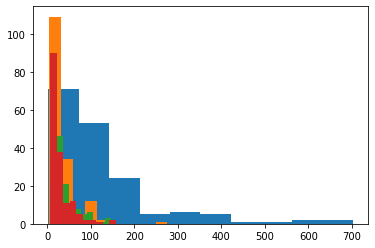

In [ ]:
plt.hist(y_train_df[y_train_df.y == 3]['mean_variance'])
plt.hist(y_train_df[y_train_df.y == 2]['mean_variance'][:163])
plt.hist(y_train_df[y_train_df.y == 1]['mean_variance'][:163])
plt.hist(y_train_df[y_train_df.y == 0]['mean_variance'][:163])
plt.show()

In [ ]:
len(class3_df[class3_df.index.isin(pred_3)])

60

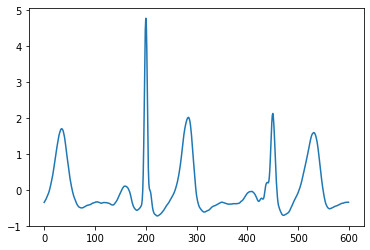

In [ ]:
plt.plot(extract_mean_heartbeats(y_train_df[y_train_df.y == 0].index[0]))
plt.show()

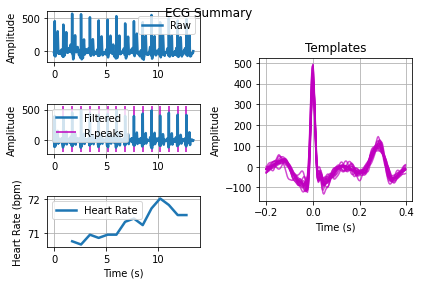

14.408966899348545


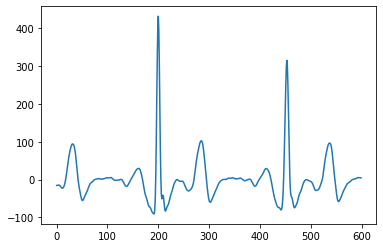

In [ ]:
plt.plot(extract_mean_heartbeats_bios(y_train_df[y_train_df.y == 0].index[0]))
plt.show()

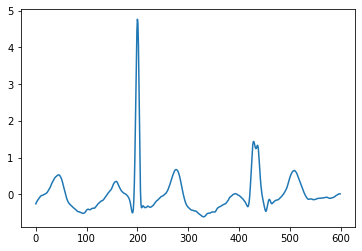

In [ ]:
plt.plot(extract_mean_heartbeats(y_train_df[y_train_df.y == 0].index[100]))
plt.show()

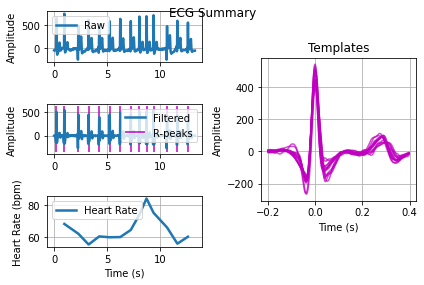

18.49905259896752


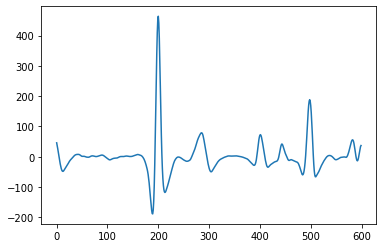

In [ ]:
plt.plot(extract_mean_heartbeats_bios(y_train_df[y_train_df.y == 1].index[100]))
plt.show()

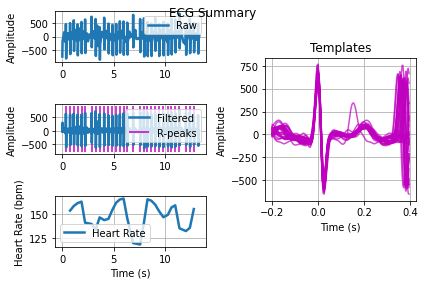

59.67808994511818


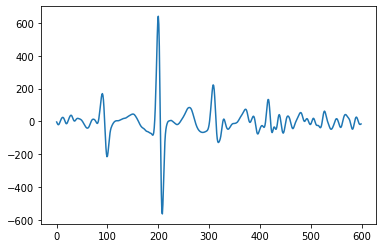

In [ ]:
plt.plot(extract_mean_heartbeats_bios(y_train_df[y_train_df.y == 1].index[0]))
plt.show()

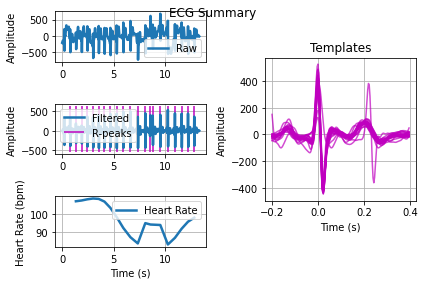

28.667931955533327


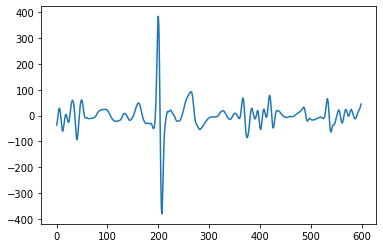

In [ ]:
plt.plot(extract_mean_heartbeats_bios(y_train_df[y_train_df.y == 2].index[0]))
plt.show()

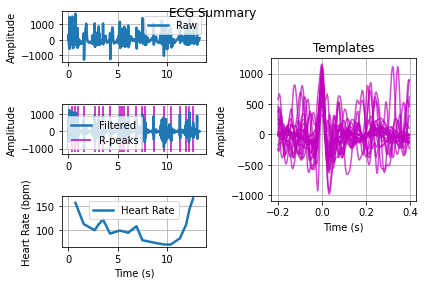

199.1236378349043


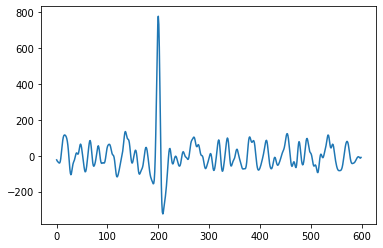

In [ ]:
plt.plot(extract_mean_heartbeats_bios(y_train_df[y_train_df.y == 3].index[0]))
plt.show()